# **Online News Popularity dataset**




## **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


**Importing the dataset and the names of the columns**

In [ ]:
names=pd.read_csv('OnlineNewsPopularity.names',sep=' ,')
data = pd.read_csv("OnlineNewsPopularity.csv",sep=", ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
pd.set_option('display.max_rows', 1000)
names # description of all columns of the dataset
# A SUPPRIMER OU REGLER LE PB DES 3 petits points

,1. Title: Online News Popularity
0,2. Source Information
1,-- Creators: Kelwin Fernandes (kafc ‘@’ inesct...
2,Pedro Vinagre (pedro.vinagre.sousa ’@’ gmail.c...
3,Pedro Sernadela
4,-- Donor: Kelwin Fernandes (kafc ’@’ inesctec....
5,"-- Date: May, 2015"
6,3. Past Usage:
7,"1. K. Fernandes, P. Vinagre and P. Cortez. A P..."
8,Support System for Predicting the Popularity o...
9,of the 17th EPIA 2015 - Portuguese Conference ...


In [ ]:
pd.set_option('display.max_columns', 100)

Taking a look at the dataset values and columns

In [ ]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
data.shape

(39644, 61)

The original dataset has 39 644 rows and 61 columns.

## **Formatting/cleaning the dataset**

Comparing the type of each column to what is inside the dataset. (PEUT ETRE CHANGE SI ON PUBLIE UNE DESCRIPTION DANS CE DATASET)

In [ ]:
print("Number of columns : {}".format(len(data.dtypes)))
pd.set_option('display.max_rows', 100)
print(data.dtypes)

Number of columns : 61
url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       f

We want to drop 'url' and 'timedelta' columns since they are not predictive

In [ ]:
data.drop(columns=['url'], axis=1,inplace=True)
data.drop(columns=['timedelta'], axis=1,inplace=True)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Checking if there are articles that are repeated in the dataset.

In [ ]:
print("Duplicated columns : {}".format(data[data.duplicated()]))

Duplicated columns : Empty DataFrame
Columns: [n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday, is_weekend, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_

There is no need to drop duplicates since there are none.

Dropping rows where values are null or NaN (not a number).

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.shape 

(39644, 59)

No rows were dropped.

Converting to type int columns that are integers (according to the description) but were categorized as 'float'.

In [ ]:
for column in ['n_tokens_title','n_tokens_content','n_non_stop_words','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords','kw_min_min','kw_max_min','kw_min_max','kw_max_max','self_reference_min_shares','self_reference_max_shares','data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_saturday','weekday_is_sunday']:
    data[column] = data[column].astype("int")

In [ ]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,496,496,496.000000,1,0,0,0,0,0,0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.000000,1,0,0,0,0,0,0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,918,918,918.000000,1,0,0,0,0,0,0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.000000,1,0,0,0,0,0,0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,545,16000,3151.157895,1,0,0,0,0,0,0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


We would like to reduce the numbers of columns to avoid having repetitive columns that are correlated to one another.
For doing so, we are going to drop the weekdays since we already have that information with week_day_is_saturday week_day_is_sunday.
Prior to dropping that column we checked that the values between these 3 columns were corresponding according to one another.
Also, we want to merge each column for each day into a single column by attributing a number to each day.
We are going to do the same for the subjects of the article and put all of the information in one column.

Then, we are going to convert these 2 column to a category type.


In [ ]:
data.drop(['is_weekend'],axis=1,inplace=True)

We create a column 'week_day' where we are going to merge the information of every day.

In [ ]:
data['weekday']='no day'

In [ ]:
data.loc[data['weekday_is_monday'] ==1, 'weekday'] = 'Monday'
data.loc[data['weekday_is_tuesday'] ==1,'weekday']='Tuesday'
data.loc[data['weekday_is_wednesday']==1,'weekday']='Wednesday'
data.loc[data['weekday_is_thursday']==1,'weekday']='Thursday'
data.loc[data['weekday_is_friday']==1,'weekday']='Friday'
data.loc[data['weekday_is_saturday']==1,'weekday']='Saturday'
data.loc[data['weekday_is_sunday']==1,'weekday']='Sunday'

In [ ]:
data['channel']='no channel'
data.loc[data['data_channel_is_lifestyle'] ==1, 'channel'] = 'lifestyle'
data.loc[data['data_channel_is_entertainment'] ==1,'channel']='entertainment'
data.loc[data['data_channel_is_bus']==1,'channel']='bus'
data.loc[data['data_channel_is_socmed']==1,'channel']='socmed'
data.loc[data['data_channel_is_tech']==1,'channel']='tech'
data.loc[data['data_channel_is_world']==1,'channel']='world'

Categorizing those two new columns:




In [ ]:
data.drop(columns=['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday'], axis=1,inplace=True)

We made a copy of data, in dataExpl because later in the project we encountered
problems with the columns with type category although we initially thought
categorizing the columns would make things easier for us.

In [ ]:
dataExpl=data.copy(deep=False)

In [ ]:
data['weekday'] = data['weekday'].astype('category')
data['channel'] = data['channel'].astype('category')



We can now drop the old redundant columns. **QUELQUE CHOSE A ETE SUPPRIME IL NY A PLUS RIEN EN DESSOUS, donc enlever ça ou trouver le pb**

### **Deciding what are going to be the class to predict**
Since, we mainly want to adress the problem as a classification problem we thought of 2 ways to invent classes but we do not put aside the posibility of resolving the problem with a regression method.
The 1st way we thought of is inventing 2 classes "Popular" and "Not Popular".
The popularity will be based on the median : if the number of shares is superior to the median then it is considered Popular. **SI PAS DE REGRESSION MODIFIER CE TEXTE**

Saving the column of shares that is going to be modified:

In [ ]:
saveShares=data['shares']

In [ ]:
medShares=data['shares'].median()
medShares=int(medShares)
print('The median values of shares is {}'.format(medShares))


The median values of shares is 1400


Statistical description of the 'shares' column that is our output.

In [ ]:
saveShares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

Creating a copy of the shares column but in categories.
2 categories : "Popular" for shares superior or equal to the median of shares
and "Not Popular" for shares inferior to the median.

In [ ]:
dataOutputCat=data.copy(deep=False)

dataOutputCat['shares']=np.where(dataOutputCat['shares']>=medShares,'Popular','Not Popular')

#keeping a save of lines with categories in series
sharesCat = dataOutputCat['shares']

### **Making a version of the dataset that is encoded for the categorical values**

We make a copy of this data set but instead of having categorical 'string' values we encode them and we scale this whole new dataset.
We are going to also create a dictionary to eventually make sens of these variables in the other phases of the project. (We are doing that mostly for the sake of the visualization of correlation plots).


We wanted to have a different dataset. One with the encoding and one with the names to better understand graphs in the data exploration phase.

In [ ]:
data['channel']

0        entertainment
1                  bus
2                  bus
3        entertainment
4                 tech
             ...      
39639             tech
39640           socmed
39641       no channel
39642            world
39643    entertainment
Name: channel, Length: 39644, dtype: category
Categories (7, object): ['bus', 'entertainment', 'lifestyle', 'no channel', 'socmed', 'tech',
                         'world']

In [ ]:
dataNumScale=data.copy(deep=False)

In [ ]:
c_channel = dataNumScale.channel.astype('category') 
channel_codes = c_channel.cat.codes 
channel_cats = c_channel.cat.categories
# est-ce que je mettrais pas channel_cats = c_channel.cat.categories.tolist()

c_weekday= dataNumScale.channel.astype('category')
weekday_codes= c_weekday.cat.codes
weekday_cats= c_weekday.cat.categories

dataNumScale['channel']=channel_codes 
dataNumScale['weekday']=weekday_codes

# a mettre en commentaire selon les calculs des modeles
dataNumScale['channel']=dataNumScale.channel.astype('category')
dataNumScale['weekday']=dataNumScale.weekday.astype('category')


In [ ]:
dataNumScale['channel']

0        1
1        0
2        0
3        1
4        5
        ..
39639    5
39640    4
39641    3
39642    6
39643    1
Name: channel, Length: 39644, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [ ]:
#print(channel_cats)
#print(channel_codes)
#print(channel_cats[channel_codes])

In [ ]:
'''
dataNumScale["weekday"] = dataNumScale["weekday"].astype("category").cat.codes
dataNumScale["channel"] = dataNumScale["channel"].astype("category").cat.codes
'''

'\ndataNumScale["weekday"] = dataNumScale["weekday"].astype("category").cat.codes\ndataNumScale["channel"] = dataNumScale["channel"].astype("category").cat.codes\n'

In [ ]:
'''
dataNumScale['weekday'].astype('category')
dataNumScale['channel'].astype('category') # cette case de code à peut être enlever selon la rapidité des calculs
#on verra
'''

"\ndataNumScale['weekday'].astype('category')\ndataNumScale['channel'].astype('category') # cette case de code à peut être enlever selon la rapidité des calculs\n#on verra\n"

Creating the dictionnaries to obtain the words associated to the numbers.

In [ ]:
'''
dataNumScale['channel']=dataNumScale.astype('str')
dataNumScale.loc[dataNumScale['channel'] =='no channel', 'channel'] = 0
dataNumScale.loc[dataNumScale['channel'] =='lifestyle', 'channel'] = 1
dataNumScale.loc[dataNumScale['channel'] =='entertainment','channel']=2
dataNumScale.loc[dataNumScale['channel']=='bus','channel']=3
dataNumScale.loc[dataNumScale['channel']=='socmed','channel']=4
dataNumScale.loc[dataNumScale['channel']=='tech','channel']=5
dataNumScale.loc[dataNumScale['channel']=='world','channel']=6

'''

"\ndataNumScale['channel']=dataNumScale.astype('str')\ndataNumScale.loc[dataNumScale['channel'] =='no channel', 'channel'] = 0\ndataNumScale.loc[dataNumScale['channel'] =='lifestyle', 'channel'] = 1\ndataNumScale.loc[dataNumScale['channel'] =='entertainment','channel']=2\ndataNumScale.loc[dataNumScale['channel']=='bus','channel']=3\ndataNumScale.loc[dataNumScale['channel']=='socmed','channel']=4\ndataNumScale.loc[dataNumScale['channel']=='tech','channel']=5\ndataNumScale.loc[dataNumScale['channel']=='world','channel']=6\n\n"

Dictionnaries associated with the encodings for week days and subjects of articles:

In [ ]:
'''
dic_days={0:'no day',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
dic_channel={0:'no channel',1:'lifestyle',2:'entertainment',3:'bus',4:'socmed',5:'tech',6:'world'}
'''

"\ndic_days={0:'no day',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}\ndic_channel={0:'no channel',1:'lifestyle',2:'entertainment',3:'bus',4:'socmed',5:'tech',6:'world'}\n"

We need to encode shares too, 1 for 'Popular' and 0 for 'Not Popular' # GARDER TEL QUEL SANS PASSER PAR CATEGORIES DE TOUTE MANIERE CEST UN OUTPUT

In [ ]:
dataNumScale['shares']=sharesCat
dataNumScale.loc[dataNumScale['shares']=='Popular','shares']=1
dataNumScale.loc[dataNumScale['shares']=='Not Popular','shares']=0
print(dataNumScale['shares'])

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Name: shares, Length: 39644, dtype: object


Categorizing these columns back (ATTENTION A ENLEVER SI PB AVEC CORR OU AVEC LES MODELES)

In [ ]:
'''
dataNumScale['shares']=dataNumScale['shares'].astype('category')
dataNumScale['weekday']=dataNumScale['weekday'].astype('category')
dataNumScale['channel']=dataNumScale['channel'].astype('category')
'''

"\ndataNumScale['shares']=dataNumScale['shares'].astype('category')\ndataNumScale['weekday']=dataNumScale['weekday'].astype('category')\ndataNumScale['channel']=dataNumScale['channel'].astype('category')\n"

Scaling all the dataNumScale dataset except the categorical columns.

In [ ]:
categorical_features=['weekday','channel','shares']
scaled_features = [name for name in dataNumScale.columns.tolist() if name not in categorical_features]

min_max_scaler = MinMaxScaler()
dataNumScale[scaled_features] = min_max_scaler.fit_transform(dataNumScale[scaled_features])
### PROBLEME IL M'a tout scale malgré tout !!!!!!
print(dataNumScale)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            0.476190          0.025844         0.000947               0.0   
1            0.333333          0.030092         0.000863               0.0   
2            0.333333          0.024900         0.000820               0.0   
3            0.333333          0.062662         0.000719               0.0   
4            0.523810          0.126505         0.000593               0.0   
...               ...               ...              ...               ...   
39639        0.428571          0.040831         0.000755               0.0   
39640        0.476190          0.038707         0.000993               0.0   
39641        0.380952          0.052160         0.000737               0.0   
39642        0.190476          0.080481         0.000770               0.0   
39643        0.380952          0.018527         0.001001               0.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num

In [ ]:
dataNumScale[scaled_features]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.000947,0.0,0.001254,0.013158,0.017241,0.007812,0.000000,0.582024,0.444444,0.002646,0.000000,0.000023,0.000000,0.0,0.000000,0.000277,0.000000,0.000000,0.000588,0.000588,0.000588,0.539735,0.408532,0.043483,0.044534,0.043273,0.521617,0.433591,0.293670,0.074074,0.769231,0.230769,0.378636,0.100000,0.70,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500
1,0.333333,0.030092,0.000863,0.0,0.001218,0.009868,0.008621,0.007812,0.000000,0.611043,0.333333,0.002646,0.000000,0.000023,0.000000,0.0,0.000000,0.000277,0.000000,0.000000,0.000000,0.000000,0.000000,0.862741,0.054049,0.054453,0.054073,0.053927,0.341246,0.483864,0.277432,0.084822,0.733333,0.266667,0.286915,0.033333,0.70,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000
2,0.333333,0.024900,0.000820,0.0,0.001021,0.009868,0.008621,0.007812,0.000000,0.546334,0.555556,0.002646,0.000000,0.000023,0.000000,0.0,0.000000,0.000277,0.000000,0.000000,0.001089,0.001089,0.001089,0.234945,0.036000,0.036252,0.035977,0.735758,0.702222,0.639345,0.365765,0.051255,0.857143,0.142857,0.495833,0.100000,1.00,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000
3,0.333333,0.062662,0.000719,0.0,0.001024,0.029605,0.000000,0.007812,0.000000,0.547768,0.666667,0.002646,0.000000,0.000023,0.000000,0.0,0.000000,0.000277,0.000000,0.000000,0.000000,0.000000,0.000000,0.030824,0.452833,0.537664,0.031197,0.030815,0.429850,0.440851,0.266460,0.112018,0.666667,0.333333,0.385965,0.136364,0.80,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000
4,0.523810,0.126505,0.000593,0.0,0.000832,0.062500,0.163793,0.156250,0.000000,0.582331,0.666667,0.002646,0.000000,0.000023,0.000000,0.0,0.000000,0.000277,0.000000,0.000000,0.000646,0.018973,0.003737,0.030888,0.031096,0.031060,0.030837,0.954956,0.513502,0.601604,0.479953,0.065575,0.860215,0.139785,0.411127,0.033333,1.00,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.428571,0.040831,0.000755,0.0,0.001054,0.029605,0.060345,0.007812,0.010989,0.562470,0.777778,0.000000,0.002249,0.004066,0.031898,1.0,0.444637,0.696103,0.013419,0.069573,0.013518,0.056919,0.043915,0.027010,0.027000,0.164893,0.026982,0.833982,0.482679,0.477638,0.241641,0.078142,0.722222,0.277778,0.333791,0.100000,0.75,0.740000,0.500,0.875000,0.100000,0.500000,0.800000,0.000000
39640,0.476190,0.038707,0.000993,0.0,0.001362,0.029605,0.060345,0.023438,0.527473,0.547842,0.666667,0.000000,0.002064,0.004320,0.007708,1.0,0.228846,0.460777,0.018332,0.078307,0.002490,0.002490,0.002490,0.031660,0.030860,0.252029,0.735683,0.030819,0.564374,0.524255,0.254902,0.049458,0.812500,0.187500,0.374825,0.136364,0.70,0.788889,0.600,0.900000,0.300000,1.000000,0.400000,1.000000
39641,0.380952,0.052160,0.000737,0.0,0.000991,0.078947,0.008621,0.093750,0.010989,0.631338,0.777778,0.000000,0.002316,0.003952,0.007352,1.0,0.350824,0.485574,0.023059,0.096550,0.001660,0.001660,0.001660,0.171527,0.027026,0.027399,0.694841,0.158511,0.510296,0.373005,0.218259,0.134573,0.576923,0.423077,0.307273,0.136364,0.50,0.643561,0.200,0.833333,0.454545,0.568182,0.090909,0.136364
39642,0.1

In [ ]:
dataNumScale['shares']

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Name: shares, Length: 39644, dtype: object

In [ ]:
data['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

https://blog.octo.com/machine-learning-7-astuces-pour-scaler-python-sur-de-grands-datasets/



Contradiction : https://pbpython.com/categorical-encoding.html

# **Data exploring**

re-creating a dataset with the number of shares (just for visualization)

In [ ]:
dataVisu=data.copy(deep=False)
dataVisu['shares']=saveShares

## **Exploring column "weekday" : days that the articles are posted on the**
## **website**

### **Visualizing the shares depending on the days that the articles are posted (mean)**
### **versus  of articles posted depending on the days of the week (mean)**
### **bar plot:**
### **Count of shares depending on the day that the article was posted.**


NOTE PERSO ENLEVER LE NOISE SUR TOKEN : https://www.kaggle.com/thehapyone/exploratory-analysis-for-online-news-popularity

Printing out the total for each day of articles posted.

In [ ]:
x=dataVisu.value_counts(['weekday'])
print(x)

weekday  
Wednesday    7435
Tuesday      7390
Thursday     7267
Monday       6661
Friday       5701
Sunday       2737
Saturday     2453
dtype: int64


**Mean of shares depending on the days of the week**

[3647.0258219486564, 3202.5006765899866, 3303.4053799596504, 3178.5991468281272, 3285.181020873531, 4078.1850794944967, 3746.7405918889294]


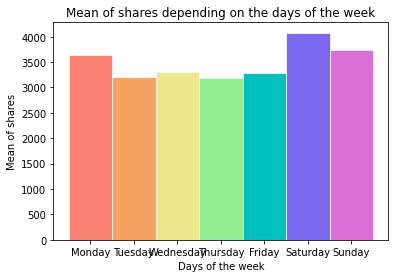

<Figure size 1468.8x1353.6 with 0 Axes>

In [ ]:
daysOrder=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
meanDayShares=[]
#colorsList=['lightcoral','mediumpurple','paleturquoise','palegreen','rosybrown','indianred','lightgreen']
colorsList=['salmon','sandybrown','khaki','lightgreen','c','mediumslateblue','orchid']
for el in daysOrder:
  meanDayShares.append(dataVisu[dataVisu['weekday']==el]['shares'].mean())

print(meanDayShares)

fig, ax = plt.subplots()

ax.bar(daysOrder, meanDayShares, width=1, edgecolor="white", linewidth=0.7, color=colorsList)
plt.title('Mean of shares depending on the days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Mean of shares')
plt.figure(figsize=[20.4, 18.8])

plt.show()

# we could have used this:
# dataVisu.groupby(['weekday']).mean().plot(kind='bar', y='shares')
# but we wanted to have the days in true order.

### **Comparison : how many shares in total in the dataset for each day**
### **vs. how many articles written in total for each day.**

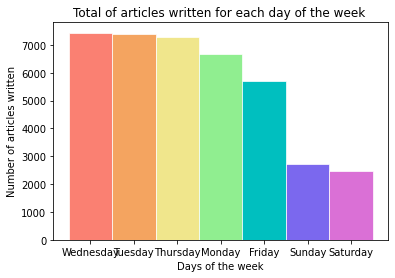

<Figure size 1468.8x1353.6 with 0 Axes>

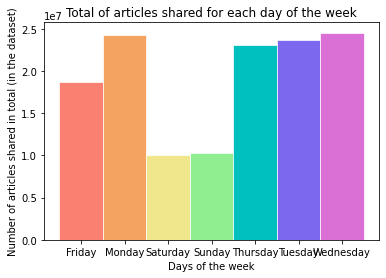

<Figure size 1468.8x1353.6 with 0 Axes>

In [ ]:
dataVisu['shares']=saveShares

a=dataVisu['weekday'].value_counts()
b=dataVisu.groupby(['weekday'])['shares'].sum()
a=a.tolist()
b=b.tolist()
lst=['Wednesday','Tuesday','Thursday','Monday','Friday','Sunday','Saturday']
lst2=['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
fig, ax = plt.subplots()

ax.bar(lst,a, width=1, edgecolor="white", linewidth=0.7, color=colorsList)
plt.xlabel('Days of the week')
plt.ylabel('Number of articles written')
plt.title('Total of articles written for each day of the week ')
plt.figure(figsize=[20.4, 18.8])
plt.show()


plt.bar(lst2,b, width=1, edgecolor="white", linewidth=0.7, color=colorsList)
plt.xlabel('Days of the week')
plt.ylabel('Number of articles shared in total (in the dataset)')
plt.title('Total of articles shared for each day of the week')

plt.figure(figsize=[20.4, 18.8])

plt.show()

### **Pie charts of the same data above**

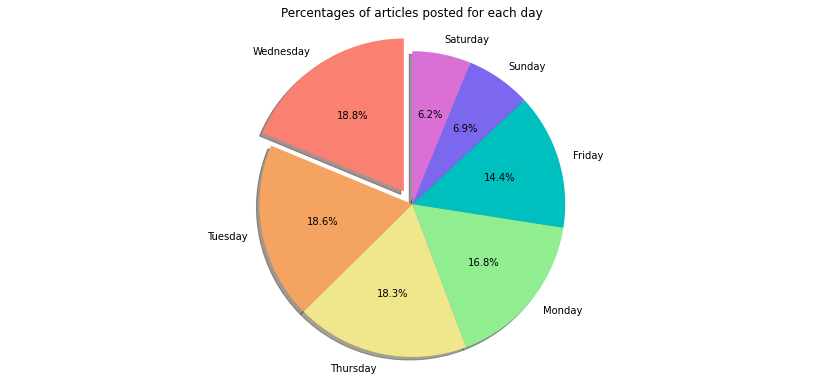

In [ ]:
explode = (0.1, 0, 0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
fig1.set_size_inches(14.5, 6.5)
ax1.pie(a, explode=explode, labels=lst, autopct='%1.1f%%', shadow=True, startangle=90,colors=colorsList)
ax1.axis('equal')  
plt.title('Percentages of articles posted for each day')

plt.show()

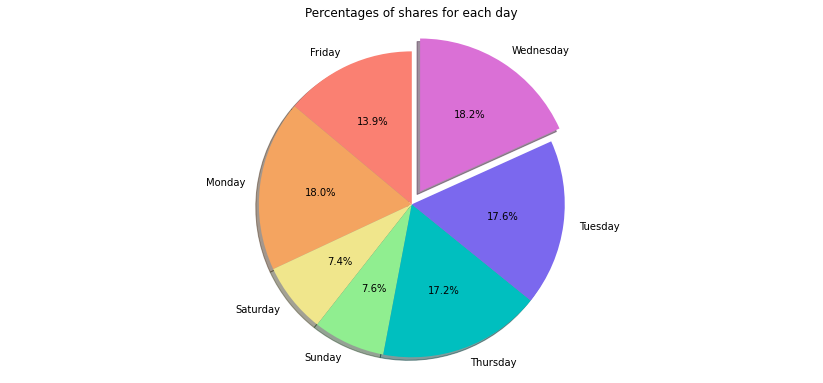

In [ ]:
explode = (0, 0, 0, 0, 0, 0, 0.1)  

fig1, ax1 = plt.subplots()
fig1.set_size_inches(14.5, 6.5)
ax1.pie(b, explode=explode, labels=lst2, autopct='%1.1f%%', shadow=True, startangle=90,colors=colorsList)
ax1.axis('equal')  
plt.title('Percentages of shares for each day')

plt.show()

In [ ]:
'''

dayz = df.columns.values[26:33]
days = []
for day in dayz:
    days.append(day[11:])
unpopular=df[df['shares'] <= 1400]
popular=df[df['shares']>= 1400]
unpop_day = unpopular[dayz].sum().values
pop_day = popular[dayz].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Number of popular and unpopular news by day")

plt.bar(np.arange(len(days)),pop_day,width=0.3,align='center',color='orange',label='Popular')
plt.bar(np.arange(len(days))-0.3,unpop_day,width=0.3,align='center',color='mediumseagreen',label='Unpopular')

plt.xticks(np.arange(len(days)),days)
plt.ylabel('Number of news')
plt.xlabel('Day of Week')


plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()
'''
'''
dataVisu['shares']=saveShares
medShares=dataVisu['shares'].median()
testPop=dataVisu[dataVisu['shares']>=medShares]
testNotPop=dataVisu[dataVisu['shares']<medShares]
'''
'''
a= sns.barplot(x='weekday',y='shares',data=testPop)
b = sns.barplot(x='weekday',y='shares',data=testNotPop)
'''
'''
plt.bar(x='weekday',data=testPop,color='orange',label='Popular',width=0.3,align='center')
plt.bar(y='weekday',data=testNotPop,color='green',label='Not Popular')
'''
'''
plt.bar(weekday,pop_day,width=0.3,align='center',color='orange',label='Popular')
plt.bar(np.arange(len(days))-0.3,unpop_day,width=0.3,align='center',color='mediumseagreen',label='Unpopular')

plt.show()
'''

"\nplt.bar(weekday,pop_day,width=0.3,align='center',color='orange',label='Popular')\nplt.bar(np.arange(len(days))-0.3,unpop_day,width=0.3,align='center',color='mediumseagreen',label='Unpopular')\n\nplt.show()\n"

In [ ]:

'''days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dataVisu['shares']=saveShares
medShares=dataVisu['shares'].median()
testPop=dataVisu[dataVisu['shares']>=medShares]
testNotPop=dataVisu[dataVisu['shares']<medShares]
fig = plt.figure(figsize = (13,5))
plt.title("Number of popular and unpopular news by day")

plt.bar(days,pop_day,width=0.3,align='center',color='orange',label='Popular')
plt.bar(np.arange(len(days))-0.3,unpop_day,width=0.3,align='center',color='mediumseagreen',label='Unpopular')

plt.xticks(np.arange(len(days)),days)
plt.ylabel('Number of news')
plt.xlabel('Day of Week')


plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()
'''

'days=[\'Monday\',\'Tuesday\',\'Wednesday\',\'Thursday\',\'Friday\',\'Saturday\',\'Sunday\']\ndataVisu[\'shares\']=saveShares\nmedShares=dataVisu[\'shares\'].median()\ntestPop=dataVisu[dataVisu[\'shares\']>=medShares]\ntestNotPop=dataVisu[dataVisu[\'shares\']<medShares]\nfig = plt.figure(figsize = (13,5))\nplt.title("Number of popular and unpopular news by day")\n\nplt.bar(days,pop_day,width=0.3,align=\'center\',color=\'orange\',label=\'Popular\')\nplt.bar(np.arange(len(days))-0.3,unpop_day,width=0.3,align=\'center\',color=\'mediumseagreen\',label=\'Unpopular\')\n\nplt.xticks(np.arange(len(days)),days)\nplt.ylabel(\'Number of news\')\nplt.xlabel(\'Day of Week\')\n\n\nplt.legend(loc = \'upper right\')\nplt.tight_layout()\nplt.show()\n'

In [ ]:
'''
test=dataVisu.copy(deep=False)
test['shares']=np.where(test['shares']>=medShares,'Popular','Not Popular')
sns.factorplot(x = 'weekday', y='shares', hue = 'shares',data=test, kind='bar')
plt.show()
'''

"\ntest=dataVisu.copy(deep=False)\ntest['shares']=np.where(test['shares']>=medShares,'Popular','Not Popular')\nsns.factorplot(x = 'weekday', y='shares', hue = 'shares',data=test, kind='bar')\nplt.show()\n"

We also did it with matplotlib.

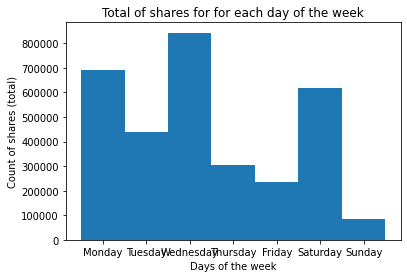

In [ ]:
dataVisu['shares']=saveShares

fig, ax = plt.subplots()

ax.bar(dataVisu['weekday'], dataVisu['shares'], width=1,linewidth=0.7)
plt.title("Total of shares for for each day of the week")
plt.ylabel('Count of shares (total)')
plt.xlabel('Days of the week')


plt.show() # A EFFACER OU REMPLACER DANS NOTRE PARTIE AVEC COUNT
# a tuner ou enlever

### **How many articles in total were written for each day:**
#### Count plot of the articles written for each day (cumulative)

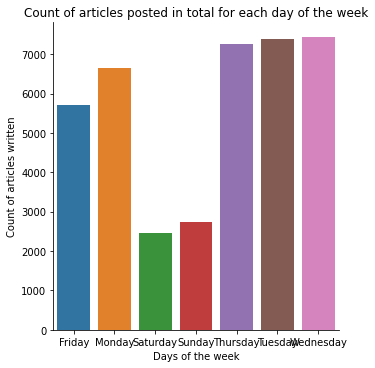

In [ ]:
a= sns.catplot(x='weekday', data= dataVisu,kind='count')
a.set(xlabel='Days of the week', ylabel='Count of articles written',title='Count of articles posted in total for each day of the week')

### **What are the total shares in the dataset per day?**
Barplot to show the cumulated number of shares per day.

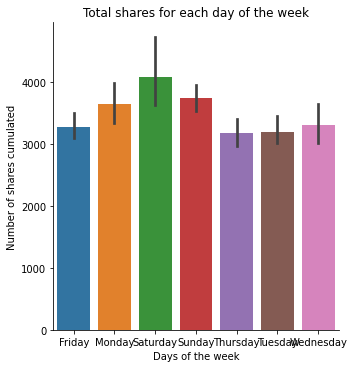

In [ ]:
dataVisu['shares']=saveShares
b= sns.catplot(x='weekday',y='shares',data= dataVisu, kind='bar').set(title='Total shares for each day of the week')
b.set(xlabel='Days of the week',ylabel='Number of shares cumulated')

# MERGE LES DEUX GRAPHES AVEC UNE GRID!! urgent

### **Comparison : What are the most written about subjects on the mashable website**
### **versus how many shares cumulated for each subject in the whole dataset.**
### Bar plot : how many shares depending on the subject of the article (channel)

<Figure size 2520x1800 with 0 Axes>

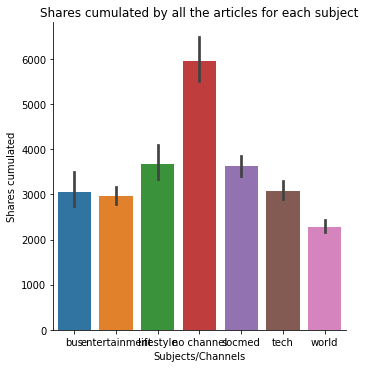

In [ ]:
dataVisu['shares']=saveShares

fig = plt.figure(figsize = (35,25))
a = sns.catplot(x="channel", y="shares",data=dataVisu, kind="bar")
a.set(xlabel='Subjects/Channels', ylabel='Shares cumulated')
a.set(title='Shares cumulated by all the articles for each subject')

plt.show()

### **How many articles written about a subject for each subject**
### Countplot

<Figure size 2520x1800 with 0 Axes>

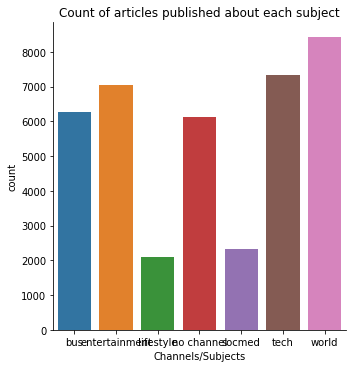

In [ ]:
fig = plt.figure(figsize = (35,25))
b= sns.catplot(x='channel', data=dataVisu, kind='count')
b.set_xlabels(label='Channels/Subjects')
b.set(title='Count of articles published about each subject')
plt.show()


##Count articles 'Popular' vs 'Not Popular'


In [ ]:
''' IRRELEVANT AF

a=sns.catplot(x='shares',data=data,kind='count')
# PROBLEME JE DEVRAI AVOIR POPULAR/NOT POPULAR , donc quand on règle ce problème :
# changer syntaxe du format en dessous (not popular au lieu de 0 etc)
print('Count of "Not popular"/"Popular" articles : {}'.format(data['shares'].value_counts()))

'''

' IRRELEVANT AF\n\na=sns.catplot(x=\'shares\',data=data,kind=\'count\')\n# PROBLEME JE DEVRAI AVOIR POPULAR/NOT POPULAR , donc quand on règle ce problème :\n# changer syntaxe du format en dessous (not popular au lieu de 0 etc)\nprint(\'Count of "Not popular"/"Popular" articles : {}\'.format(data[\'shares\'].value_counts()))\n\n'

## **Exploring the column "shares" (output)**

### **Boxplot of the shares.**

Text(0.5, 1.0, 'Boxplot of the shares')

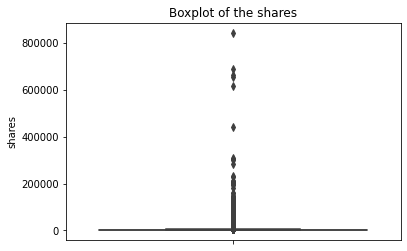

In [ ]:
dataVisu['shares']=saveShares
a= sns.boxplot(y='shares',data= dataVisu)
a.set_title('Boxplot of the shares')

Zooming on the inferior part of the graph, because most of the dataset is in the lowerpart:

Text(0.5, 1.0, 'Boxplot of the shares zoomed in')

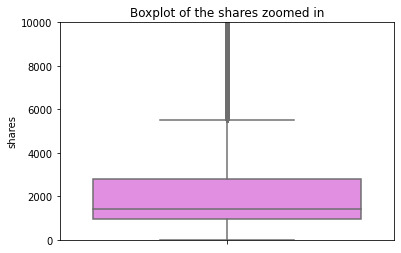

In [ ]:
dataVisu['shares']=saveShares
a= sns.boxplot(y='shares',data= dataVisu,color='violet')
a.set_ylim(ymin=0,ymax=10000)
a.set_title('Boxplot of the shares zoomed in')


Maximum values of shares:

In [ ]:
dataVisu.shares.max() 

843300

### **Histogram : Shares distribution**


 The maximum value of shares in the dataset is 843300

 Description of the shares column:
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


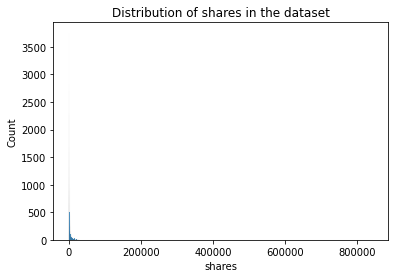

In [ ]:
dataVisu['shares']=saveShares
a=sns.histplot(data=dataVisu, x="shares")
a.set(title='Distribution of shares in the dataset')

print('\n The maximum value of shares in the dataset is {}'.format(dataVisu.shares.max()))
print('\n Description of the shares column:')
print(dataVisu['shares'].describe())

With this graph along with the boxplot graph, we noticed that a few of the articles have an extremely high number of shares very far from the value of the median. 
Now that we noticed that, we would like to visualize the part where most of the dataset is concentrated, and for that we are going to zoom in. We took a 3000 that is higher than the third quantile but not as high as 843300

(0.0, 5000.0)

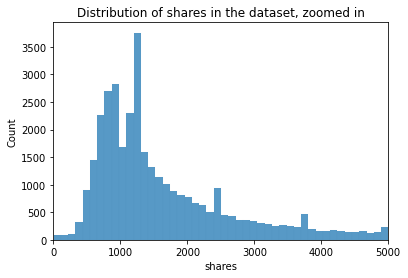

In [ ]:
dataVisu['shares']=saveShares
a=sns.histplot(data=dataVisu, x="shares")
a.set(title='Distribution of shares in the dataset, zoomed in')
a.set_xlim(xmin=0,xmax=5000)

#GRAPHIQUE A AMELIORER SURTOUT POUR MIEUX VOIR SEP ENTRE LES BINS

# IDEE!!! Tracer des axes pour montrer la médiane quantile etc et dans le graph avant aussi

## **Exploring content of the article**
Title, words, images, videos, ____

### **Number of words in title for Popular and Not Popular articles.**


Text(0, 0.5, 'Popular and Not Popular')

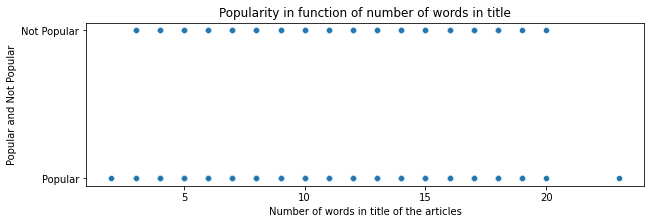

In [ ]:
# Scatterplot
dataVisu['shares']=sharesCat

plt.figure(figsize=(10,3))
sns.scatterplot(x='n_tokens_title',y='shares',data=dataVisu)
plt.title('Popularity in function of number of words in title')
plt.xlabel('Number of words in title of the articles')
plt.ylabel('Popular and Not Popular')

Text(0, 0.5, 'Number of shares')

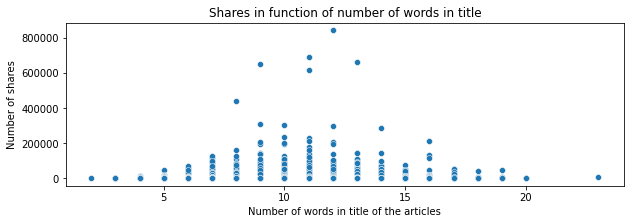

In [ ]:
dataVisu['shares']=saveShares
plt.figure(figsize=(10,3))
sns.scatterplot(x='n_tokens_title',y='shares',data=dataVisu)
plt.title('Shares in function of number of words in title')
plt.xlabel('Number of words in title of the articles')
plt.ylabel('Number of shares')

Mean of number of words in the title of "Popular" articles:

In [ ]:
dataVisu['shares']=sharesCat
dataVisu[dataVisu['shares']=='Popular']['n_tokens_title'].mean()

10.311761369008225

Mean of number of words in the title of "Not popular" articles:

In [ ]:
dataVisu['shares']=sharesCat
dataVisu[dataVisu['shares']=='Not Popular']['n_tokens_title'].mean()

10.498269334775554

Mean of number of words in the title of all articles in the dataset:

In [ ]:
dataVisu['n_tokens_title'].mean()
dataVisu['n_tokens_title'].describe()

count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

### **Boxplot of number of words in the article's title depending on its popularity**

Text(0, 0.5, 'Popularity')

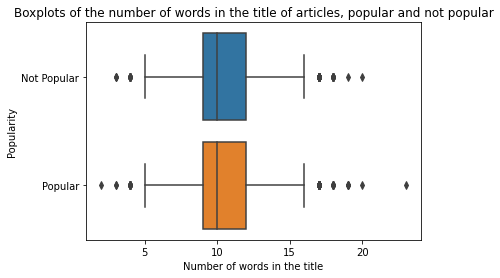

In [ ]:
dataVisu['shares']=sharesCat
a= sns.boxplot(x='n_tokens_title',y='shares',data=dataVisu)
a.set(title='Boxplots of the number of words in the title of articles, popular and not popular')
a.set_xlabel('Number of words in the title')
a.set_ylabel('Popularity')

### **Distribution of articles by number of words in title**

[Text(0, 0.5, 'Count of articles'),
 Text(0.5, 0, "Number of words in article's title")]

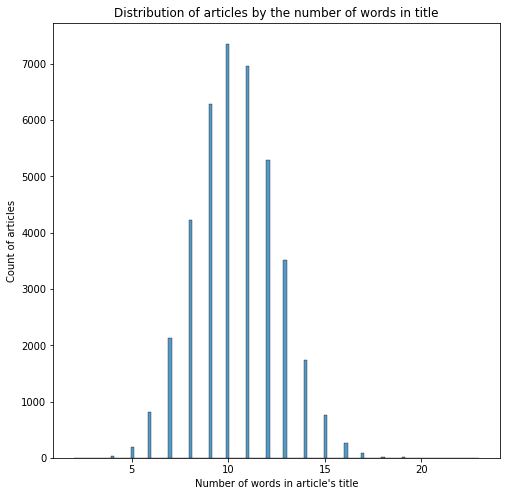

In [ ]:
fig = plt.figure(figsize = (8,8))
a= sns.histplot(x='n_tokens_title',data=dataVisu)
a.set(title='Distribution of articles by the number of words in title')
a.set(xlabel="Number of words in article's title",ylabel='Count of articles')


Are there articles in our dataset with 0 words in the title?
Checking just in case if they could impact our future result.

In [ ]:
dataVisu['n_tokens_title'].min()

2

In [ ]:
dataVisu[dataVisu['n_tokens_title']==2].value_counts()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  LDA_00    LDA_01    LDA_02    LDA_03    LDA_04    global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  abs_title_sentiment_polarity  shares   weekday  channel      
2               465               0.000841         0                 0.001081                  5          5               1         21          0.54502             

In [ ]:
dataVisu[dataVisu['n_tokens_title']==3].value_counts()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  LDA_00    LDA_01    LDA_02    LDA_03    LDA_04    global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  abs_title_sentiment_polarity  shares       weekday   channel      
3               711               0.000738         0                 0.001144                  6          4               0         1           0.569652       

The minimum value of words in a title in an article is 2 and appears once.
There are 5 articles that contain 3 words in their title.
A priori the number of words in title **is not** a feature that is going to cause us trouble.
By looking at the boxplot and the scatterplots, we can make an observation that is that between 'Not Popular' and 'Popular' articles, the number of words in the title is not very different. But by looking at the scatterplot with the exact values of shares (*not categorical*), we see that articles around **10 words** are **more popular**. So the influence of the number of words in the title will really depend our **type of prediction** if we consider our problem  a **classification** problem or a **regression** problem.

For the part, where we consider our problem as a **classification** problem we need to take a closer look at the exact values that helped constitute the boxplot with the 'Popular' and 'Not Popular' values.

In [ ]:
dataVisu['shares']= sharesCat
testPop=dataVisu[dataVisu['shares']=='Popular']
testNotPop=dataVisu[dataVisu['shares']=='Not Popular']

print('Exact values of Not Popular articles and their number of words in the title',end='\n')
print(testNotPop['n_tokens_title'].describe())

print('Exact values of Popular articles and their number of words in the title',end = '\n')
print(testPop['n_tokens_title'].describe())

Exact values of Not Popular articles and their number of words in the title
count    18490.000000
mean        10.498269
std          2.098995
min          3.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         20.000000
Name: n_tokens_title, dtype: float64
Exact values of Popular articles and their number of words in the title
count    21154.000000
mean        10.311761
std          2.123330
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64


Indeed, for the **classification problem**, since the dataset is just divided in two, the number of words is not very different between the 2 classes (comparing all the stats info individually). **The reality**, with keeping the shares as numbers, is that the number of words in title do influence the popularity.

Barplot confronting number words in title against the **mean** of number of shares to confirm what we have said. To that graph, we are going to add an x axe to show the **median of shares** that is our criteria for dividing the output into two categorical classes.
(The maximum of words in a title is 23 and the minimum)

### **Mean of shares in function of number of words in the title**
The blue horizontal axis represents the median of shares.

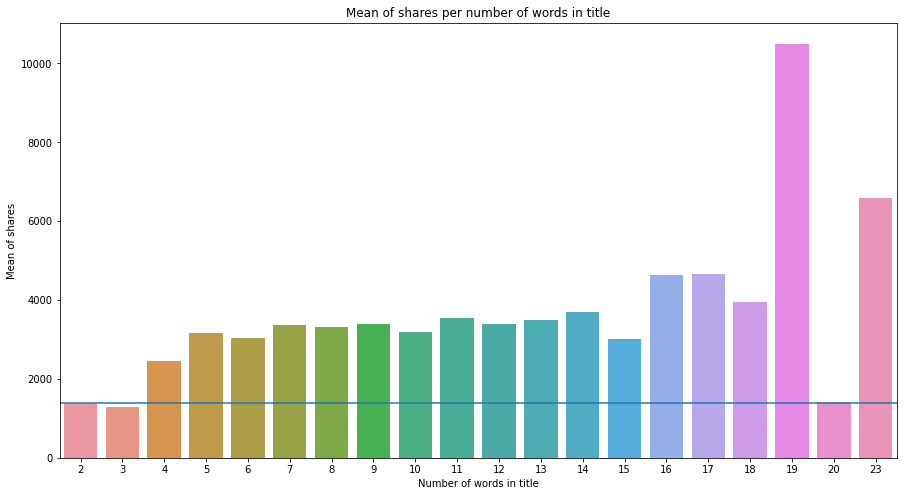

In [ ]:
dataVisu['shares']=saveShares
index_nbWordsTitle=[]
meanShares_tokenTitle=[]

for i in range(2,24):
  if len(dataVisu[dataVisu['n_tokens_title'] == i]) != 0:
    index_nbWordsTitle.append(i)
    meanShares_tokenTitle.append(dataVisu[dataVisu['n_tokens_title'] == i]['shares'].mean())

plt.figure(figsize=(15,8))
a=sns.barplot(x = index_nbWordsTitle, y = meanShares_tokenTitle)
a.axhline(medShares)
a.set(title='Mean of shares per number of words in title')
a.set(xlabel='Number of words in title',ylabel='Mean of shares')

plt.show()

Now, with the median instead of the mean:

### **Median of shares in function of number of words in title**

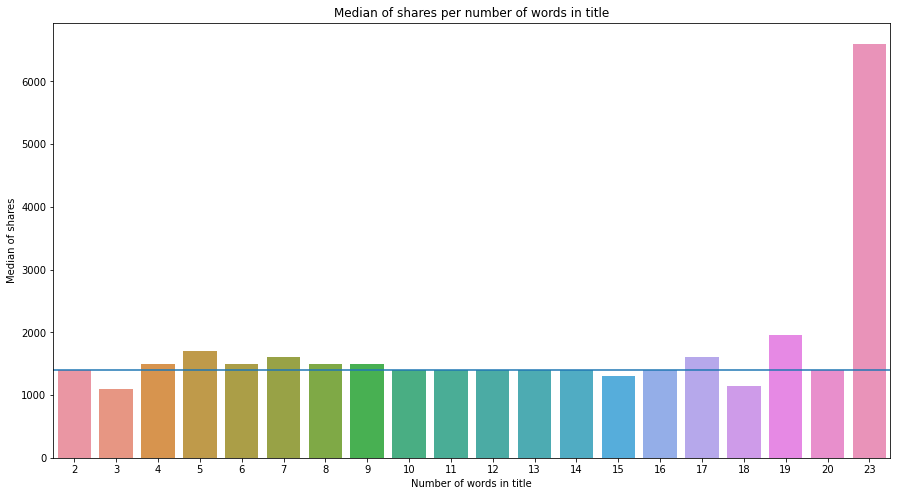

In [ ]:
dataVisu['shares']=saveShares
index_nbWordsTitle=[]
medianShares_tokenTitle=[]

for i in range(2,24):
  if len(dataVisu[dataVisu['n_tokens_title'] == i]) != 0:
    index_nbWordsTitle.append(i)
    medianShares_tokenTitle.append(dataVisu[dataVisu['n_tokens_title'] == i]['shares'].median())

plt.figure(figsize=(15,8))
a=sns.barplot(x = index_nbWordsTitle, y = medianShares_tokenTitle)
a.axhline(medShares)
a.set(title='Median of shares per number of words in title')
a.set(xlabel= 'Number of words in title',ylabel= 'Median of shares')

plt.show()


These 2 graphs confirm what we have said earlier (with the median horizontal line) : for a **classification problem** where we have 2 different categories, the categories englobe such a large amount of lines and the number of words in the title do not have really an influence on them but have an influence on the **real** number of shares.
The reality is that by taking the mean, articles with a large number of words in the title have a high number of shares.

### **Popularity of the articles depending on the total number of words in the article.**

Text(0.5, 1.0, 'Shares depending on total of words in the article')

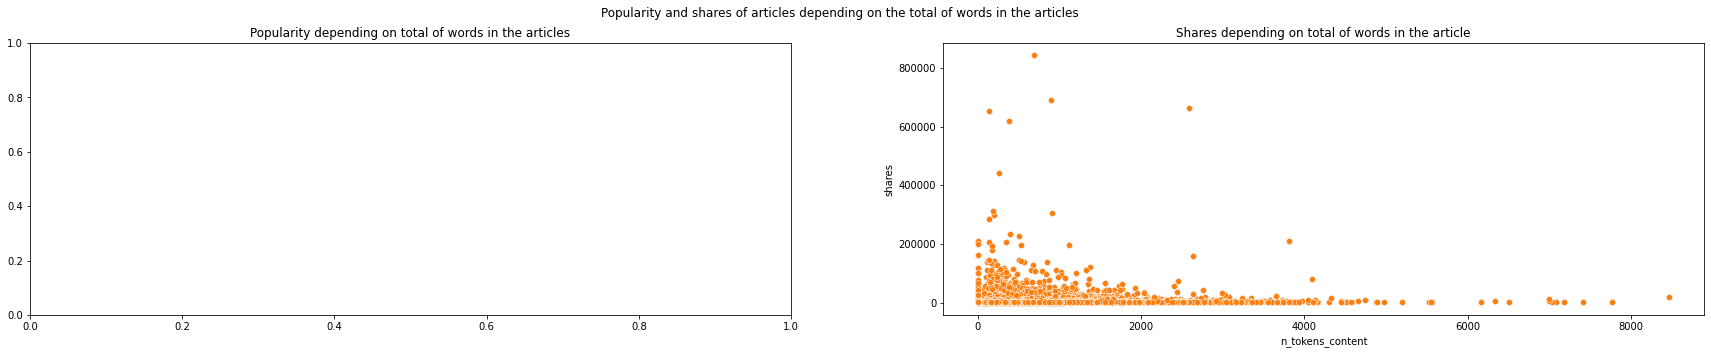

In [ ]:
dataVisu['shares']=saveShares

fig, axes = plt.subplots(1, 2,figsize=(30,5), sharex=False,sharey= False)
fig.suptitle('Popularity and shares of articles depending on the total of words in the articles')


sns.scatterplot(x='n_tokens_content',y='shares', data = data)
axes[0].set_title('Popularity depending on total of words in the articles')

#Taking the actual shares values:
x1=data['n_tokens_content']
y1=saveShares
sns.scatterplot(x=x1,y=y1)
axes[1].set_title('Shares depending on total of words in the article')


# A SUPPRIMER SI FACET GRID NE MARCHE PAS 

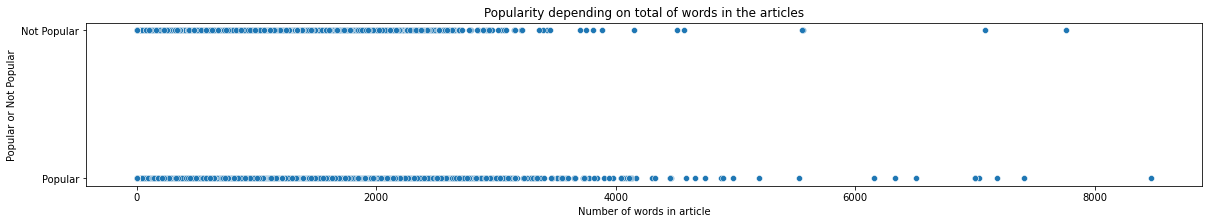

In [ ]:
# Popularity depending on total of words in the articles (Popular or Not Popular classes)
dataVisu['shares']=sharesCat

plt.figure(figsize=(20,3))
a = sns.scatterplot(x='n_tokens_content',y='shares',data=dataVisu)
a.set(title='Popularity depending on total of words in the articles')
a.set(xlabel='Number of words in article',ylabel='Popular or Not Popular')

plt.show()

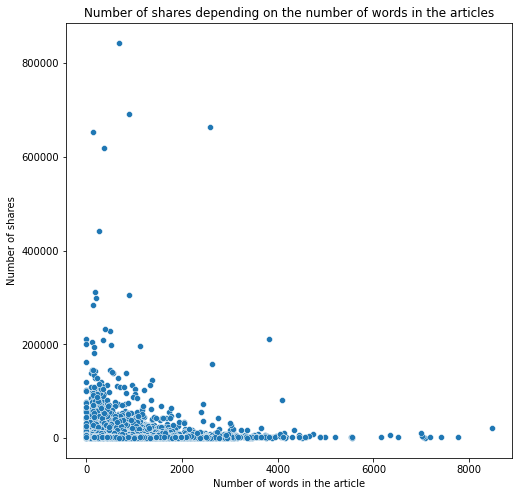

In [ ]:
# Shares depending on number of words in articles.

dataVisu['shares']=saveShares

plt.figure(figsize=(8,8))
a=sns.scatterplot(x='n_tokens_content',y='shares', data = dataVisu)
a.set(title='Number of shares depending on the number of words in the articles')
a.set(xlabel='Number of words in the article',ylabel='Number of shares')

plt.show()


Distribution of number of words in article **EN FACET GRID PRBL REGLER CE QUI EST EN COMMENTAIRE JUSTE EN BAS**

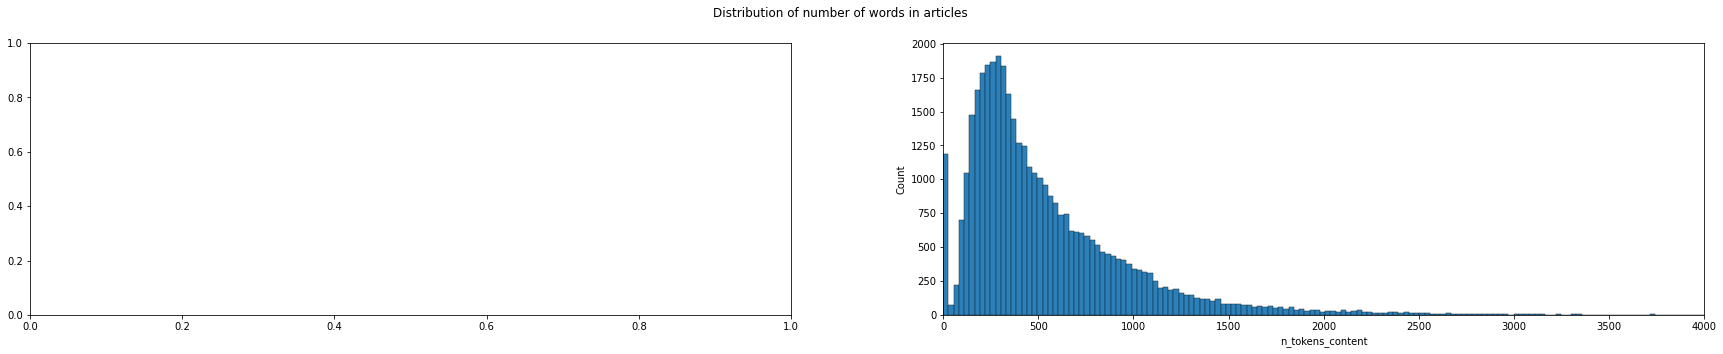

In [ ]:


fig, axes = plt.subplots(1, 2,figsize=(30,5), sharex=False,sharey= False)
fig.suptitle('Distribution of number of words in articles')

a=sns.histplot(x='n_tokens_content',data = dataVisu)

b=sns.histplot(x='n_tokens_content',data=dataVisu)
b.set_xlim(left=0, right=4000)

plt.show()
# c'est ok en séparé mais subplot nimp et ceci est fort embêtant!!!! je passe pour quoi si je mets en séparé



**VERSION SEPAREE EN BAS**

### **Distribution of number of words in article**

Description of number of words in articles:


count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

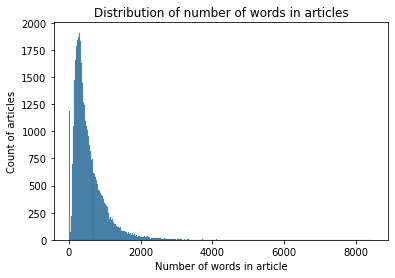

In [ ]:
a=sns.histplot(x='n_tokens_content',data = dataVisu)
a.set(title='Distribution of number of words in articles',xlabel='Number of words in article',ylabel='Count of articles')

print('Description of number of words in articles:')
dataVisu['n_tokens_content'].describe()

As we can see, most articles are around 500/50 words, we can zoom in this representation to have a better view of the distribution.

(0.0, 600.0)

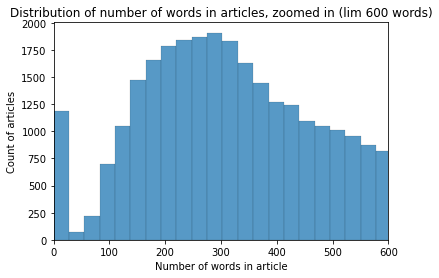

In [ ]:
a=sns.histplot(x='n_tokens_content',data = dataVisu)
a.set(title='Distribution of number of words in articles, zoomed in (lim 600 words)',xlabel='Number of words in article',ylabel='Count of articles')
a.set_xlim(left=0,right=600)

We notice that a large portion of rows (1181 ) contains articles that have 0 words  in them **and can impact our future results**


In [ ]:
dataVisu[dataVisu['n_tokens_content']==0]['n_tokens_content'].value_counts()

0    1181
Name: n_tokens_content, dtype: int64

seeing numbers of shares for those 

In [ ]:
dataVisu['shares']=saveShares
test=dataVisu[dataVisu['n_tokens_content']== 0]['shares']
test.head()

893     2500
917     1700
1062    4500
1121    6800
1312    1000
Name: shares, dtype: int64

In [ ]:
test=dataVisu[dataVisu['n_tokens_content']==0]
test['shares']

893      2500
917      1700
1062     4500
1121     6800
1312     1000
         ... 
39598    6100
39601    2300
39613    1600
39615    5700
39616    2100
Name: shares, Length: 1181, dtype: int64

**Does the number of words in article really play a part on a an article becoming popular? We are going to have a look at the boxplot of popularity by the number of words in articles**

[Text(0, 0.5, 'Popularity'), Text(0.5, 0, 'Number of words in article')]

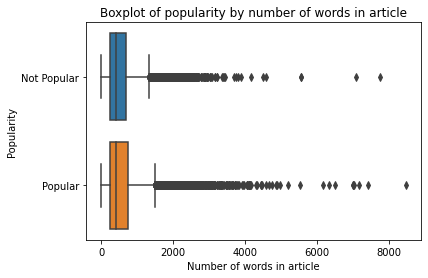

In [ ]:
dataVisu['shares']=sharesCat

a = sns.boxplot(x='n_tokens_content',y='shares',data = dataVisu)
a.set(title='Boxplot of popularity by number of words in article')
a.set(xlabel='Number of words in article',ylabel='Popularity')


Zoomed in version.

(0.0, 1500.0)

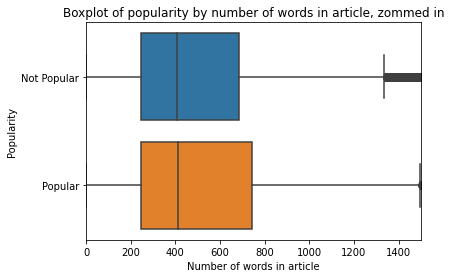

In [ ]:
dataVisu['shares']=sharesCat

a = sns.boxplot(x='n_tokens_content',y='shares',data = dataVisu)
a.set(title='Boxplot of popularity by number of words in article, zommed in')
a.set(xlabel='Number of words in article',ylabel='Popularity')
a.set_xlim(left=0,right=1500)

In [ ]:
dataVisu['shares']= sharesCat
testNotPop= dataVisu[dataVisu['shares']=='Not Popular']
testPop= dataVisu[dataVisu['shares']== 'Popular']

print('Exact values of Not Popular articles and their number of words in')
print(testNotPop['n_tokens_content'].describe())

print('Exact values of Popular articles and their number of words in')
print(testPop['n_tokens_content'].describe())

Exact values of Not Popular articles and their number of words in
count    18490.000000
mean       525.636885
std        424.434317
min          0.000000
25%        248.000000
50%        406.000000
75%        683.750000
max       7764.000000
Name: n_tokens_content, dtype: float64
Exact values of Popular articles and their number of words in
count    21154.000000
mean       564.763354
std        507.713045
min          0.000000
25%        245.000000
50%        412.000000
75%        745.000000
max       8474.000000
Name: n_tokens_content, dtype: float64


Observation: After examining the boxplot/stats, popular articles have a little more words in them (by looking at the mean, the median, third quantile and max). 

**LE RETIRE-T-ON?**

### **Distribution of articles depending on number of images.**

[Text(0, 0.5, 'Count of articles'),
 Text(0.5, 0, 'Number of images in the article')]

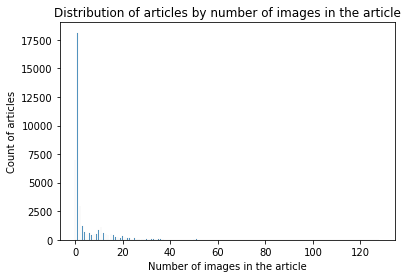

In [ ]:
a=sns.histplot(x='num_imgs',data=dataVisu)
a.set(title='Distribution of articles by number of images in the article')
a.set(xlabel='Number of images in the article',ylabel='Count of articles')

Zooming in:

[Text(0, 0.5, 'Count of articles'),
 Text(0.5, 0, 'Number of images in the article')]

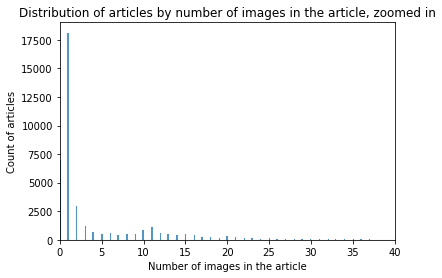

In [ ]:
a=sns.histplot(x='num_imgs',data=data)
a.set_xlim(left=0,right=40)
a.set(title='Distribution of articles by number of images in the article, zoomed in')
a.set(xlabel='Number of images in the article',ylabel='Count of articles')

Most articles don't have images in the dataset. To obtain more information, we decide to plot a boxplot and print the statistical information :

[Text(0, 0.5, 'Number of images in the article')]

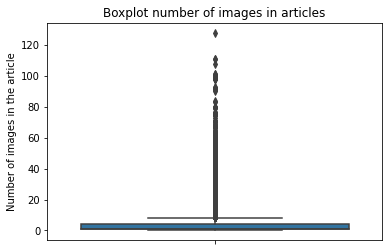

In [ ]:
a= sns.boxplot(y='num_imgs',data= dataVisu)
a.set_title('Boxplot of the shares')
a.set(title='Boxplot number of images in articles')
a.set(ylabel='Number of images in the article')

Here we can have a closer look at where most lines in the dataset are, by zooming in:

(0.0, 12.5)

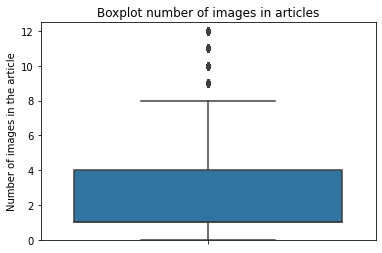

In [ ]:
a= sns.boxplot(y='num_imgs',data= dataVisu)
a.set_title('Boxplot of the shares, zoomed in')
a.set(title='Boxplot number of images in articles')
a.set(ylabel='Number of images in the article')
a.set_ylim(bottom = 0, top= 12.5)

In [ ]:
print(dataVisu['num_imgs'].describe())

count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64


**AJOUTER INTERPRETATION TRUC AU DESSUS**

**Relationship between number of shares and number of images in the articles**

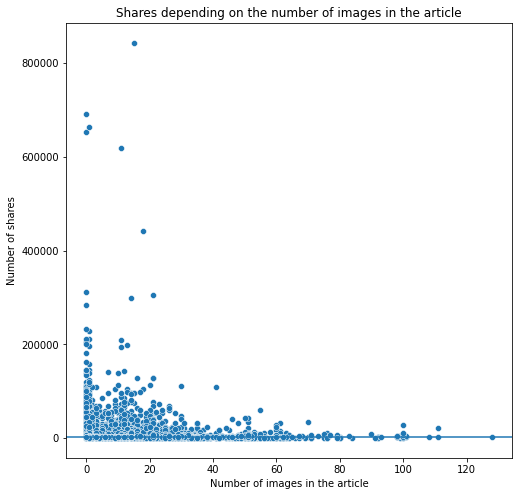

In [ ]:
dataVisu['shares']=saveShares
plt.figure(figsize=(8,8))
a = sns.scatterplot(x='num_imgs',y='shares',data=dataVisu)
plt.title('Shares depending on the number of images in the article')
plt.xlabel('Number of images in the article')
plt.ylabel('Number of shares')
a.axhline(medShares)
plt.show()

A quick remark we can make is that, the more images in the article do not make the article more shared.

**Number of shares against the number of images**
* **Mean of shares against the number of images**
* **Median of shares against the number of images**
* For these 2 graph we are going to limit ourselves to 5 images in an articles maximum since the third quantile is 4, we find it irrelevant and not very helping to represent more cases with more number of images.

### **Mean of shares depending on the number of images in the article**

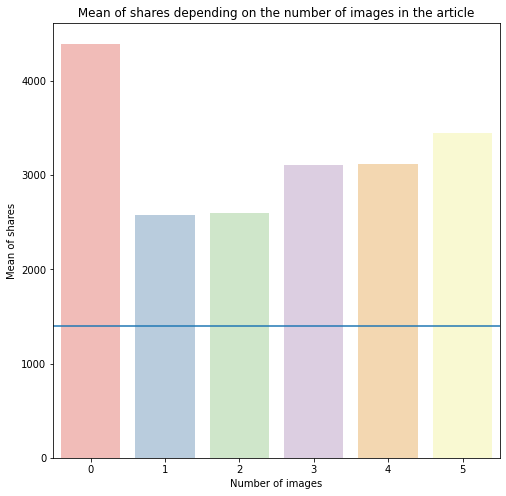

In [ ]:
dataVisu['shares']=saveShares

index_nbImgs=[]
meanSharesImg=[]

for i in range(0,6):
  if len(dataVisu[dataVisu['num_imgs']==i])!=0:
    index_nbImgs.append(i)
    meanSharesImg.append(dataVisu[dataVisu['num_imgs']==i]['shares'].mean())
  
plt.figure(figsize=(8,8))
a=sns.barplot(x=index_nbImgs,y=meanSharesImg,palette='Pastel1')
a.set(title=' Mean of shares depending on the number of images in the article ')
a.set(xlabel='Number of images')
a.set(ylabel='Mean of shares')
a.axhline(medShares)
plt.show()


### **Median of shares depending on the number of images in the articles**

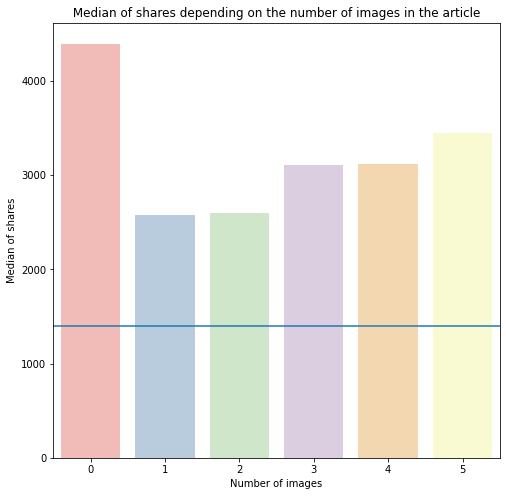

In [ ]:
dataVisu['shares']=saveShares

index_nbImgs=[]
medianSharesImg=[]

for i in range(0,6):
  if len(dataVisu[dataVisu['num_imgs']==i])!=0:
    index_nbImgs.append(i)
    medianSharesImg.append(dataVisu[dataVisu['num_imgs']==i]['shares'].median())
  
plt.figure(figsize=(8,8))
a=sns.barplot(x=index_nbImgs,y=meanSharesImg,palette='Pastel1')
a.set(title=' Median of shares depending on the number of images in the article ')
a.set(xlabel='Number of images')
a.set(ylabel='Median of shares')
a.axhline(medShares)
plt.show()

We can see from the graphs that articles with more images do not make an article more popular or less popular (articles with 5 images have a better median of shares than articles with 2 images but articles with 0 images have higher shares than articles with 5 images, therefore number of images do not make an article more or less popular).

When considering the problem as a classification problem with only 2 classes, the number of images is not really going to have an impact on if an article is popular or not according to the blue horizontal line.

To further prove our point, we are going to plot separately the articles that are not popular and those who are popular along with the number of images.

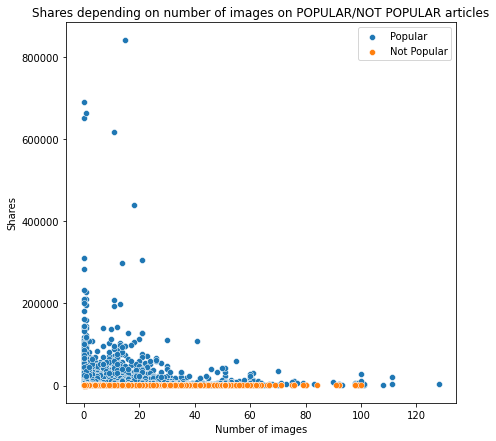

In [ ]:
dataVisu['shares']=saveShares

testPop=dataVisu[dataVisu['shares']>=1400]
testNotPop= dataVisu[dataVisu['shares']<1400]

fig=plt.figure(figsize=(7,7))

a=sns.scatterplot(x='num_imgs',y='shares', data= testPop)
a.set(title='Shares depending on number of images on POPULAR/NOT POPULAR articles')
a.set(xlabel='Number of images',ylabel='Shares')

b=sns.scatterplot(x='num_imgs', y = 'shares', data= testNotPop)

plt.legend(labels=["Popular","Not Popular"])
plt.show()

### **Impact of number of videos**

**Distribution of number of videos in the articles**

[Text(0, 0.5, 'Count of articles'), Text(0.5, 0, 'Number of videos')]

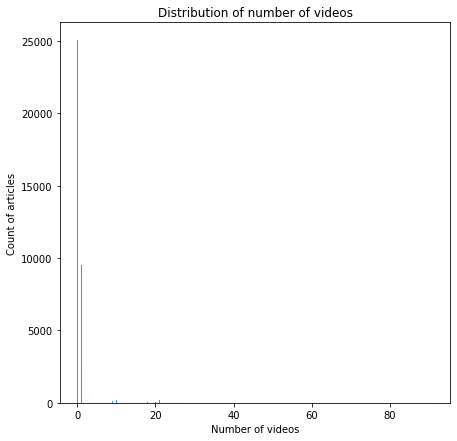

In [ ]:
dataVisu['shares']=saveShares
fig=plt.figure(figsize=(7,7))

a = sns.histplot(x='num_videos', data = dataVisu)
a.set(title='Distribution of number of videos')
a.set(xlabel='Number of videos', ylabel= 'Count of articles')

Zoomed in version:

(0.0, 25.0)

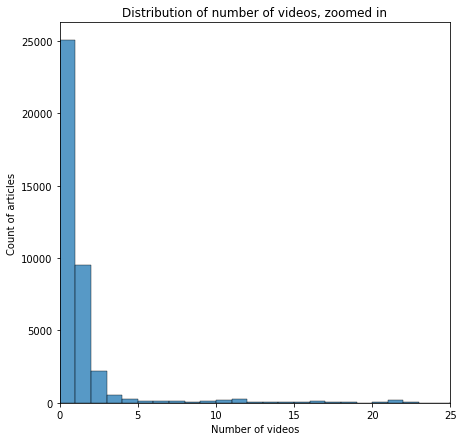

In [ ]:
dataVisu['shares']=saveShares
fig=plt.figure(figsize=(7,7))

a = sns.histplot(x='num_videos', data = dataVisu,binwidth=1)
a.set(title='Distribution of number of videos, zoomed in')
a.set(xlabel='Number of videos', ylabel= 'Count of articles')
a.set_xlim(left=0,right=25)

In [ ]:
print(dataVisu['num_videos'].describe())

count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64


Most articles in the dataset have between 0 and 1 videos.

In [ ]:
dataVisu[dataVisu['num_videos']==91]['shares']

18101    13600
Name: shares, dtype: int64

**Relationship between number of videos and shares**

Text(0, 0.5, 'Shares')

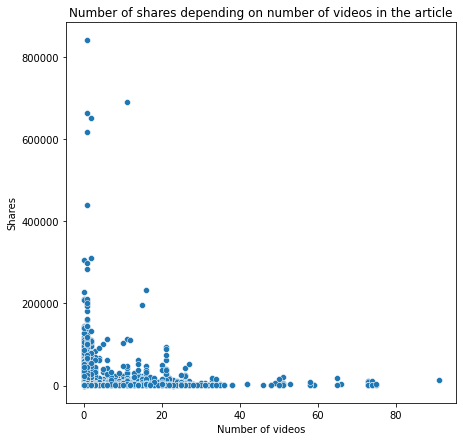

In [ ]:
dataVisu['shares']=saveShares

fig=plt.figure(figsize=(7,7))

a= sns.scatterplot(x='num_videos',y='shares',data = dataVisu)
a.set_title('Number of shares depending on number of videos in the article')
a.set_xlabel('Number of videos')
a.set_ylabel('Shares')

### **Distributions of columns that we have not plotted yet that have to do with the content of the article in relation to the number of shares (scatterplots)**


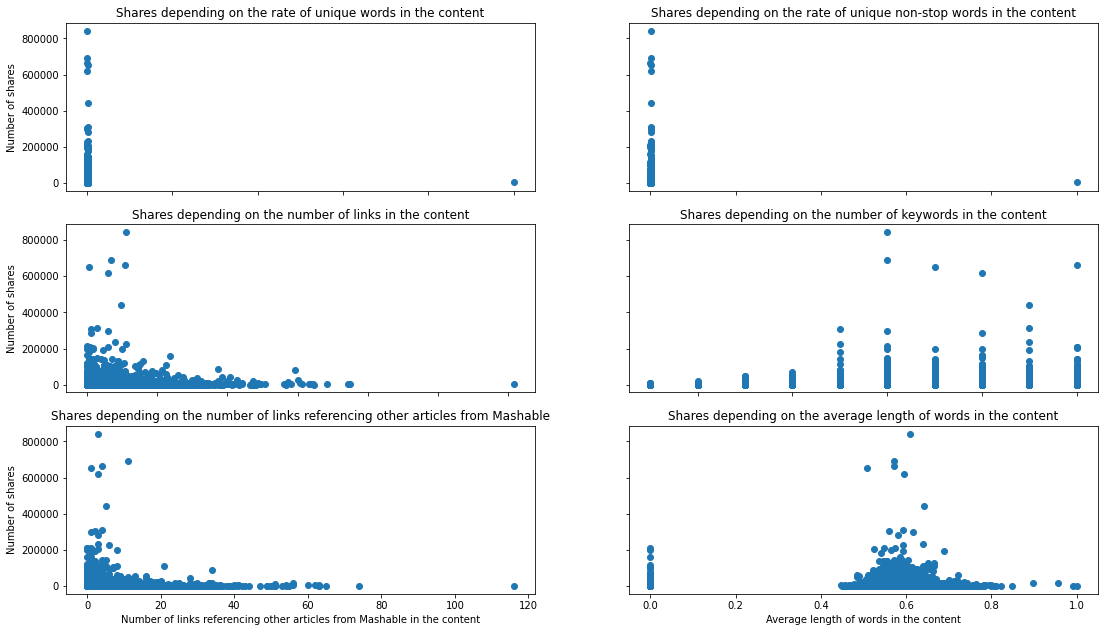

In [ ]:
dataVisu['shares']=saveShares
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5)

axs[0, 0].scatter(dataVisu['n_unique_tokens']*100, dataVisu['shares'])
axs[0, 0].set_title('Shares depending on the rate of unique words in the content')
axs[0, 0].set_xlabel('Rate of unique words in the content')
axs[0, 0].set_ylabel('Number of shares')

axs[0, 1].scatter(dataVisu['n_non_stop_unique_tokens']*100, dataVisu['shares'])
axs[0, 1].set_title('Shares depending on the rate of unique non-stop words in the content')
axs[0, 1].set_xlabel('Rate of unique non-stop words in the content')
axs[0, 1].set_ylabel('Number of shares')

axs[1, 0].scatter(dataVisu['num_hrefs'],dataVisu['shares'])
axs[1, 0].set_title('Shares depending on the number of links in the content')
axs[1, 0].set_xlabel('Number of links in the content')
axs[1, 0].set_ylabel('Number of shares')

axs[1, 1].scatter(dataVisu['num_keywords'], dataVisu['shares'])
axs[1, 1].set_title('Shares depending on the number of keywords in the content')
axs[1, 1].set_xlabel('Number of keywords in the content')
axs[1, 1].set_ylabel('Number of shares')

axs[2, 0].scatter(dataVisu['num_self_hrefs'],dataVisu['shares'])
axs[2, 0].set_title('Shares depending on the number of links referencing other articles from Mashable')
axs[2, 0].set_xlabel('Number of links referencing other articles from Mashable in the content')
axs[2, 0].set_ylabel('Number of shares')

axs[2, 1].scatter(dataVisu['average_token_length'],dataVisu['shares'])
axs[2, 1].set_title('Shares depending on the average length of words in the content')
axs[2, 1].set_xlabel('Average length of words in the content')
axs[2, 1].set_ylabel('Number of shares')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    # PROBLEME XLABEL ET YLABEL QUE POUR CEUX DU BAS
    # AJOUTER AXHLINE DE MEDSHARES ? dans une couleur dif de bleu


Plotting it with the two classes instead of the number of shares:

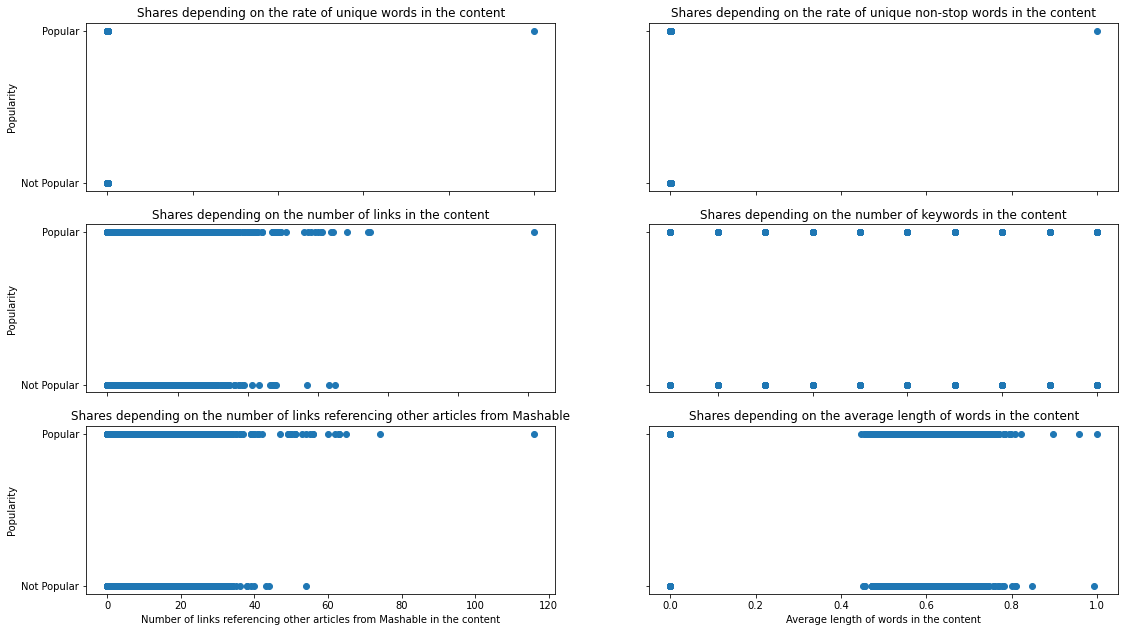

In [ ]:
dataVisu['shares']=sharesCat
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5)

axs[0, 0].scatter(dataVisu['n_unique_tokens']*100, dataVisu['shares'])
axs[0, 0].set_title('Shares depending on the rate of unique words in the content')
axs[0, 0].set_xlabel('Rate of unique words in the content')
axs[0, 0].set_ylabel('Popularity')

axs[0, 1].scatter(dataVisu['n_non_stop_unique_tokens']*100, dataVisu['shares'])
axs[0, 1].set_title('Shares depending on the rate of unique non-stop words in the content')
axs[0, 1].set_xlabel('Rate of unique non-stop words in the content')
axs[0, 1].set_ylabel('Popularity')

axs[1, 0].scatter(dataVisu['num_hrefs'],dataVisu['shares'])
axs[1, 0].set_title('Shares depending on the number of links in the content')
axs[1, 0].set_xlabel('Number of links in the content')
axs[1, 0].set_ylabel('Popularity')

axs[1, 1].scatter(dataVisu['num_keywords'], dataVisu['shares'])
axs[1, 1].set_title('Shares depending on the number of keywords in the content')
axs[1, 1].set_xlabel('Number of keywords in the content')
axs[1, 1].set_ylabel('Popularity')

axs[2, 0].scatter(dataVisu['num_self_hrefs'],dataVisu['shares'])
axs[2, 0].set_title('Shares depending on the number of links referencing other articles from Mashable')
axs[2, 0].set_xlabel('Number of links referencing other articles from Mashable in the content')
axs[2, 0].set_ylabel('Popularity')

axs[2, 1].scatter(dataVisu['average_token_length'],dataVisu['shares'])
axs[2, 1].set_title('Shares depending on the average length of words in the content')
axs[2, 1].set_xlabel('Average length of words in the content')
axs[2, 1].set_ylabel('Popularity')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    # PROBLEME XLABEL ET YLABEL QUE POUR CEUX DU BAS
    # AJOUTER AXHLINE DE MEDSHARES ? dans une couleur dif de bleu

### **Do the shares of referenced articles affect the shares of the article?**

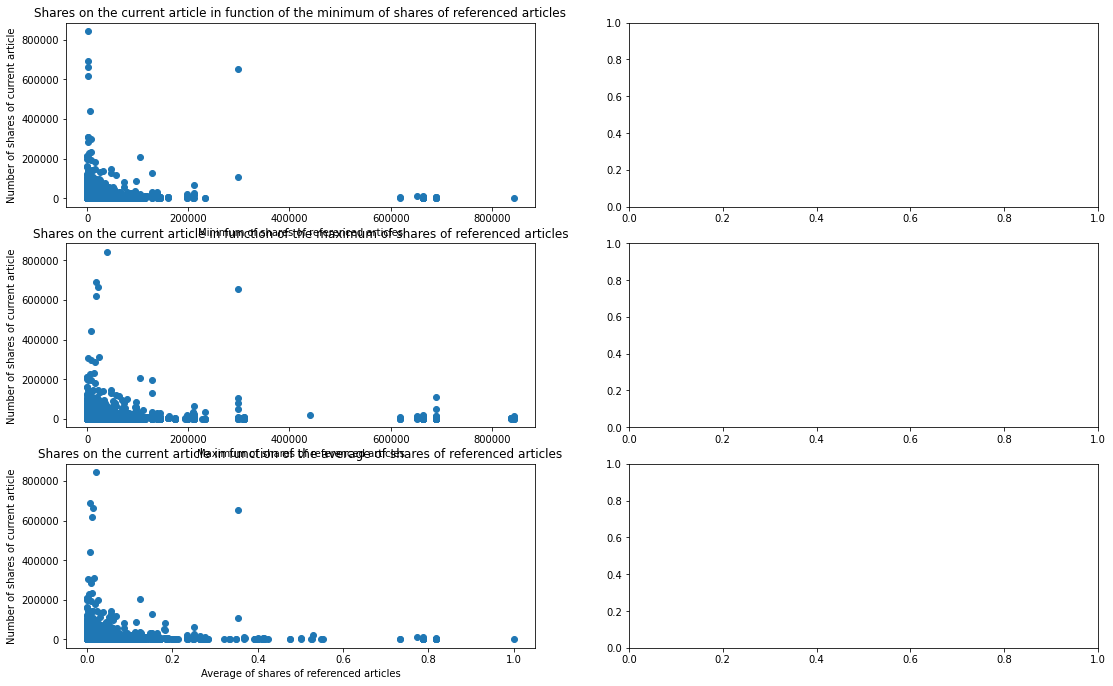

In [ ]:
dataVisu['shares']=saveShares
fig, axs = plt.subplots(3, 2) # JARRIVE PAS A FAIRE AUTREMENT QUE 2, il faudrait 1
fig.set_size_inches(18.5, 11.5)

axs[0, 0].scatter(dataVisu['self_reference_min_shares'], dataVisu['shares'])
axs[0, 0].set_title('Shares on the current article in function of the minimum of shares of referenced articles')
axs[0, 0].set_xlabel('Minimum of shares of referenced articles')
axs[0, 0].set_ylabel('Number of shares of current article')

axs[1, 0].scatter(dataVisu['self_reference_max_shares'], dataVisu['shares'])
axs[1, 0].set_title('Shares on the current article in function of the maximum of shares of referenced articles')
axs[1, 0].set_xlabel('Maximum of shares of referenced articles')
axs[1, 0].set_ylabel('Number of shares of current article')

axs[2, 0].scatter(dataVisu['self_reference_avg_sharess'], dataVisu['shares'])
axs[2, 0].set_title('Shares on the current article in function of the average of shares of referenced articles')
axs[2, 0].set_xlabel('Average of shares of referenced articles')
axs[2, 0].set_ylabel('Number of shares of current article')

plt.show()
# COMMENT ESPACER LES PLOTS LES UNS ENTRE LES AUTRE (haut/dessous) pcq lettres se superposent

###**Histograms of all the features**


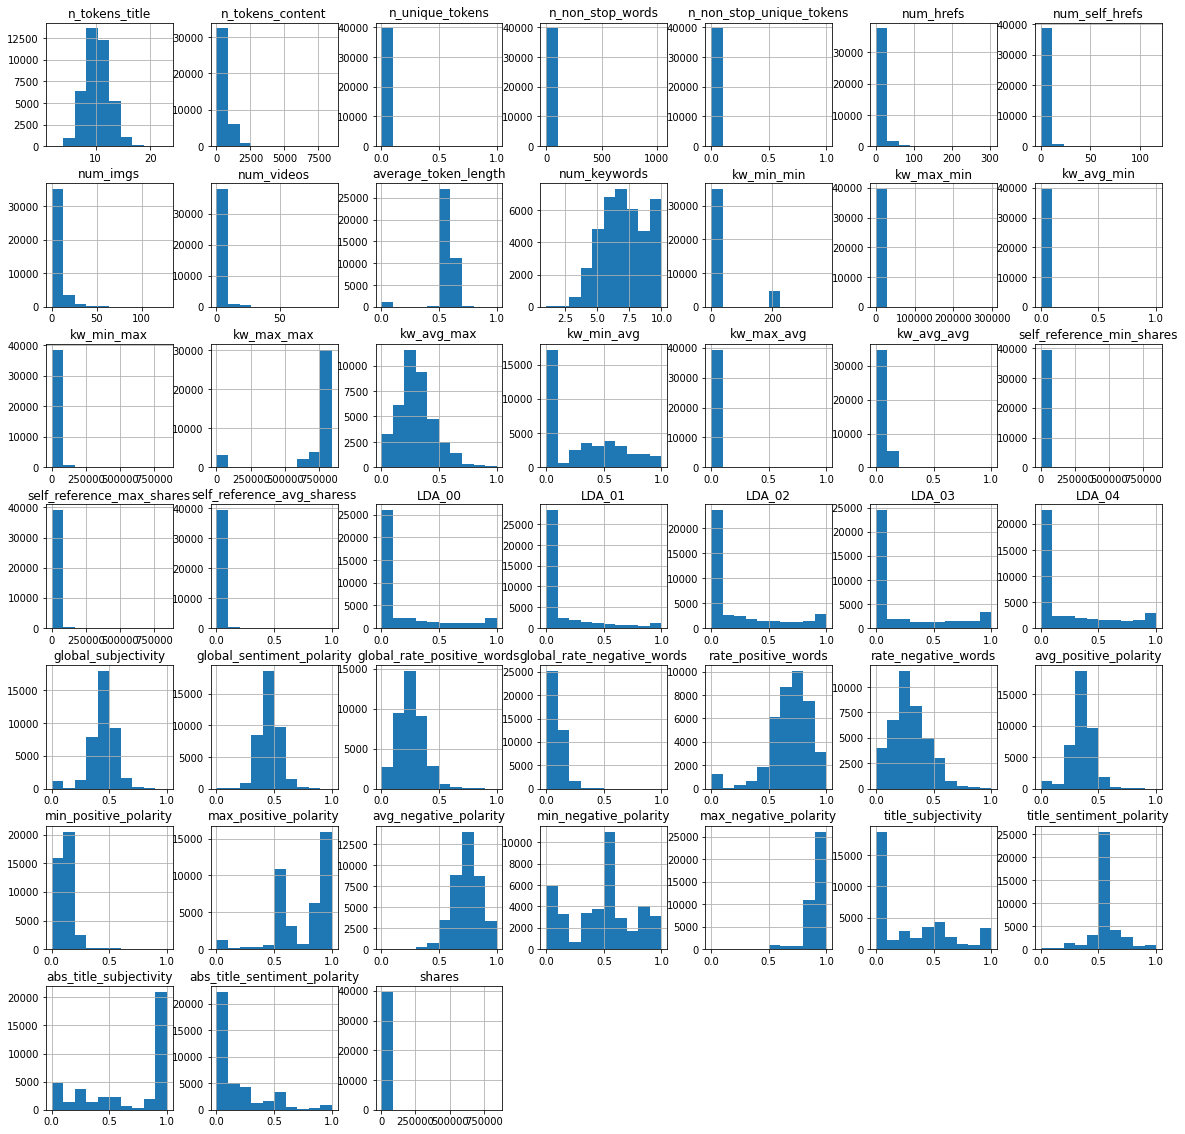

In [ ]:
dataVisu.hist(figsize=(20,20))
plt.show()

Observation : about number of videos, we would say the same thing that we said
about images. More or less videos do not make the article more or less popular.

 INTERPRETATION : A COMPLETER!

In [ ]:
dataNumScale['channel']=dataNumScale.channel.astype('int')
dataNumScale['weekday']=dataNumScale.weekday.astype('int')


Despite of having encoded the channel and weekday columns we encountered problemns with the method cat.codes and with classifiers.
For instance, in the correlation matrix there were incoherences.
We decided to manually encode them.

In [ ]:
dataExpl.loc[dataExpl['weekday'] == 'no day', 'weekday'] = 0
dataExpl.loc[dataExpl['weekday'] == 'Monday', 'weekday'] = 1
dataExpl.loc[dataExpl['weekday'] == 'Tuesday','weekday'] = 2
dataExpl.loc[dataExpl['weekday'] == 'Wednesday','weekday'] = 3
dataExpl.loc[dataExpl['weekday'] == 'Thursday','weekday'] = 4
dataExpl.loc[dataExpl['weekday'] == 'Friday','weekday'] = 5
dataExpl.loc[dataExpl['weekday'] == 'Saturday','weekday'] = 6
dataExpl.loc[dataExpl['weekday'] == 'Sunday','weekday'] = 7

In [ ]:
dataExpl.loc[dataExpl['channel'] == 'no channel', 'channel'] = 0
dataExpl.loc[dataExpl['channel'] == 'lifestyle', 'channel'] = 1
dataExpl.loc[dataExpl['channel'] == 'entertainment','channel'] = 2
dataExpl.loc[dataExpl['channel'] == 'bus','channel'] = 3
dataExpl.loc[dataExpl['channel'] == 'socmed','channel'] = 4
dataExpl.loc[dataExpl['channel'] == 'tech','channel'] = 5
dataExpl.loc[dataExpl['channel'] == 'world','channel'] = 6

In [ ]:
dataExpl['shares']=np.where(dataExpl['shares']>= medShares,1,0)

In [ ]:
dataExpl['channel']=dataExpl.channel.astype('int')
dataExpl['weekday']=dataExpl.weekday.astype('int')

In [ ]:
data

In [ ]:
dataExpl[scaled_features] = min_max_scaler.fit_transform(dataExpl[scaled_features])


## General Correlation matrix **AJOUTER INTERPRETATION**

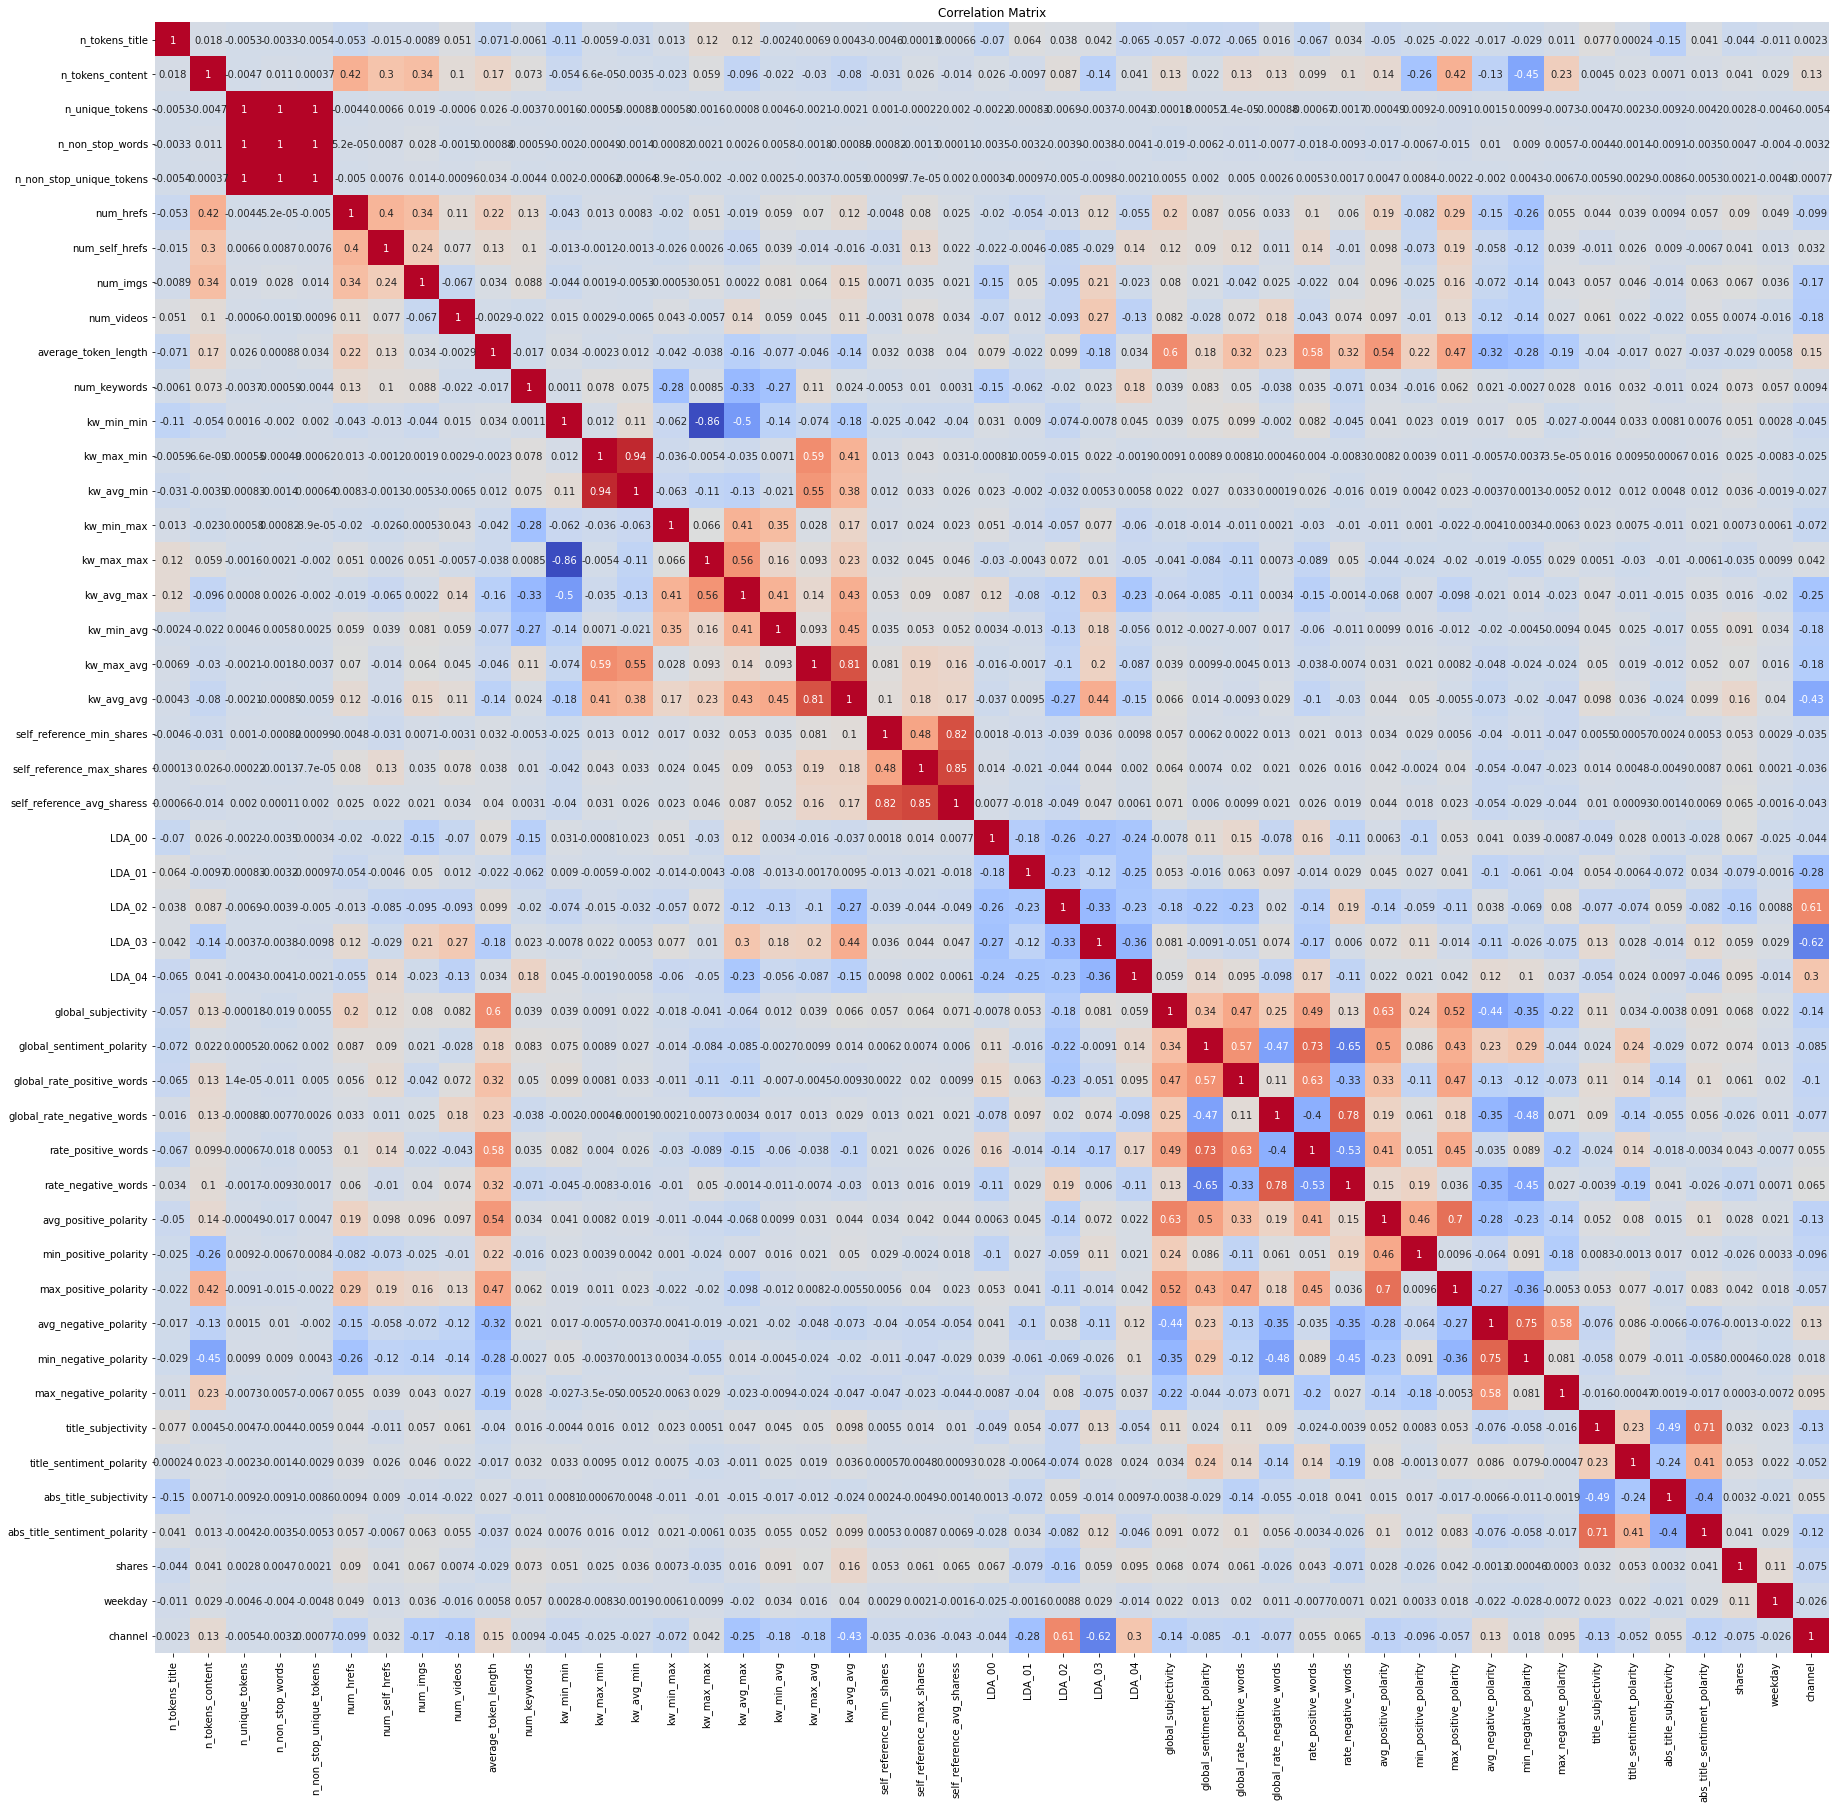

In [ ]:
correlation=dataExpl.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cbar=False,annot=True,data=correlation,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**What are the most correlated features to the output?**
## **Correlation matrix of the 15 features most correlated to 'shares'**

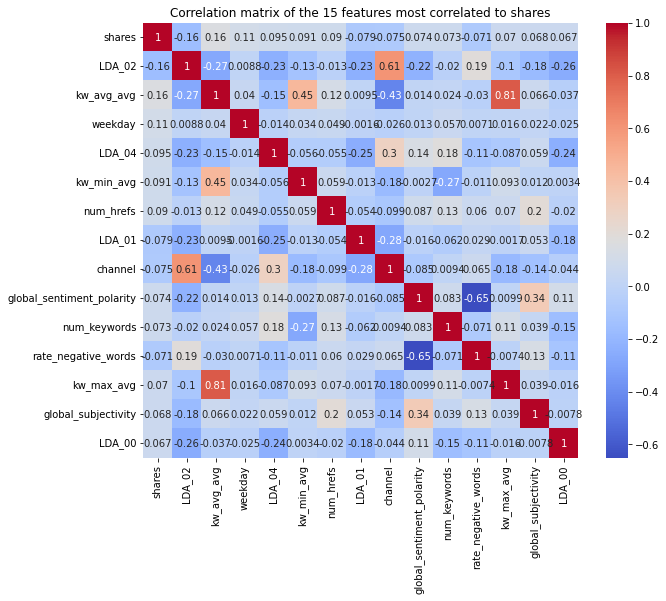

In [ ]:
corr=dataExpl.corr()
cols=corr.abs().nlargest(15,'shares')['shares'].index
cm=np.corrcoef(dataExpl[cols].values.T)
plt.figure(figsize=(10, 8))
ax=sns.heatmap(cm,xticklabels=cols.values,yticklabels=cols.values,cmap='coolwarm',annot=True,square=True)
ax.set(title="Correlation matrix of the 15 features most correlated to shares");
plt.show()

## Principal Component Analysis

In [ ]:
pca= PCA(n_components=4)
y=dataExpl["shares"]
x=dataExpl.drop("shares",axis=1)

principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])

sharesDataframe = dataExpl[['shares']]

newDataframe = pd.concat([principalDataframe, sharesDataframe],axis = 1)



In [ ]:
newDataframe

,PC1,PC2,PC3,PC4,shares
0,1.150721,-2.500440,0.576785,0.508182,0
1,0.125711,-2.439252,-0.516013,0.563302,0
2,0.103788,-2.429304,-0.419909,0.894024,1
3,1.081887,-2.496160,-0.478132,0.236341,0
4,-1.863619,-2.283943,0.606707,1.022836,0
...,...,...,...,...,...
39639,-1.726546,-0.289112,-0.180629,0.155005,1
39640,-0.630024,-0.359355,0.590508,-0.299481,1
39641,3.320427,-0.639678,0.436688,-0.253005,1
39642,-2.774020,-0.218363,-0.423402,-0.541868,0


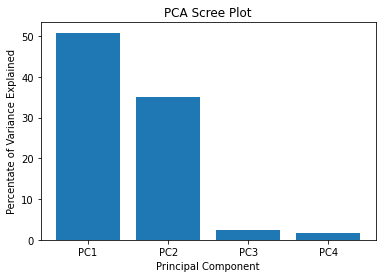

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

We can see on this graph that the first 2 principal components explain 50 and 35% of the variance of the model. Also, we can observe that the next principal components explain very little variance of the model ( very far from the two first): example: pc3 < 5%.

Plotting PC1 against PC2 and seeing where the points are located in this new 2D-plan (factorial plan)

Text(0, 0.5, 'PC2')

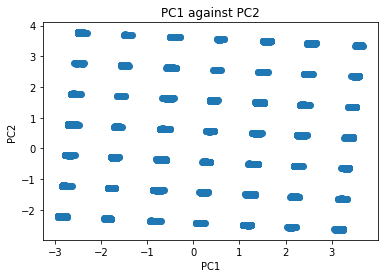

In [ ]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

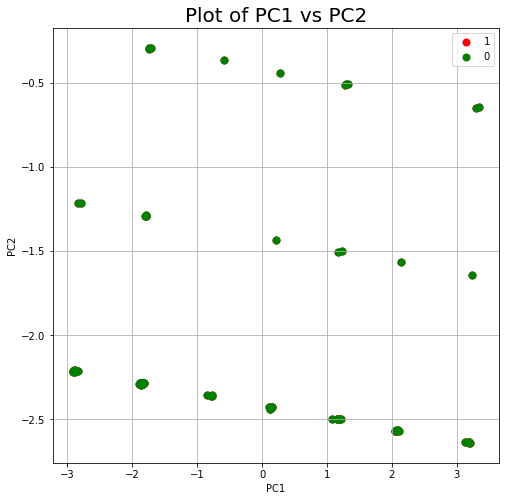

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

shares = ['1','0']

colors = ['r', 'g']

for target, color in zip(shares,colors):
    #indicesToKeep = newDataframe['shares'] == shares
    ax.scatter(newDataframe.loc[:100, 'PC1']
               , newDataframe.loc[:100, 'PC2']
               , c = color
               , s = 50)
    '''
      ax.scatter(newDataframe.loc[:100, 'PC1']
               , newDataframe.loc[:100, 'PC2']
               , c = color
               , s = 50)
    '''
 

ax.legend(shares)
ax.grid()

To us, the PCA method for dimension is not very adapted and is not a good method to represent the data.
Trying to represent the data with anoter method next:


# Kernel Principal Component Analysis
"KernelPCA is an extension of PCA which achieves non-linear dimensionality reduction through the use of kernels (see Pairwise metrics, Affinities and Kernels). It has many applications including denoising, compression and structured prediction (kernel dependency estimation). KernelPCA supports both transform and inverse_transform."  https://scikit-learn.org/stable/modules/decomposition.html#decompositions

RBF stands for Radial Basis function

In [ ]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
kpca.

SyntaxError: ignored

# **Data prediction, fitting models**

First we need to split the dataset in two parts; the train dataset to fit the model and then the test dataset to make the prediction and compute the accuracy. 

In [ ]:
dataExpl = dataExpl.sample(frac=1) #we SHUFFLE THE dataset
y=dataExpl["shares"]
x=dataExpl.drop("shares",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

Here is the list of all the models we will be using.

In [ ]:
modele_names = ["LogisticRegression","DecisionTreeClassifier","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis","RandomForestClassifier","KNeighborsClassifier","GaussianNB","GradientBoostingClassifier","AdaBoostClassifier"]
modele_names

['LogisticRegression',
 'DecisionTreeClassifier',
 'LinearDiscriminantAnalysis',
 'QuadraticDiscriminantAnalysis',
 'RandomForestClassifier',
 'KNeighborsClassifier',
 'GaussianNB',
 'GradientBoostingClassifier',
 'AdaBoostClassifier']

In [ ]:
modele_scores = []

In [ ]:
modele_scores_pred = []

Let's test different models and find out which one has the best accuracy and fit the best to the dataset by using two differents methods. First, we will make a cross-validation, then with the predict method on the dataset we previously splited and finally we will print the features importance when it will be possible

## **Logistic Regression Model**

cross-validation

In [ ]:
modele = LogisticRegression()
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
score = scores.mean()
modele_scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


predict method

In [ ]:
modele = LogisticRegression()
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


No features importances

## **Decision tree classifier**

cross-validation

In [ ]:
modele = DecisionTreeClassifier()
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

predict method

In [ ]:
modele = DecisionTreeClassifier()
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

features importances

Text(0.5, 1.0, 'Relative importance of features - RFC')

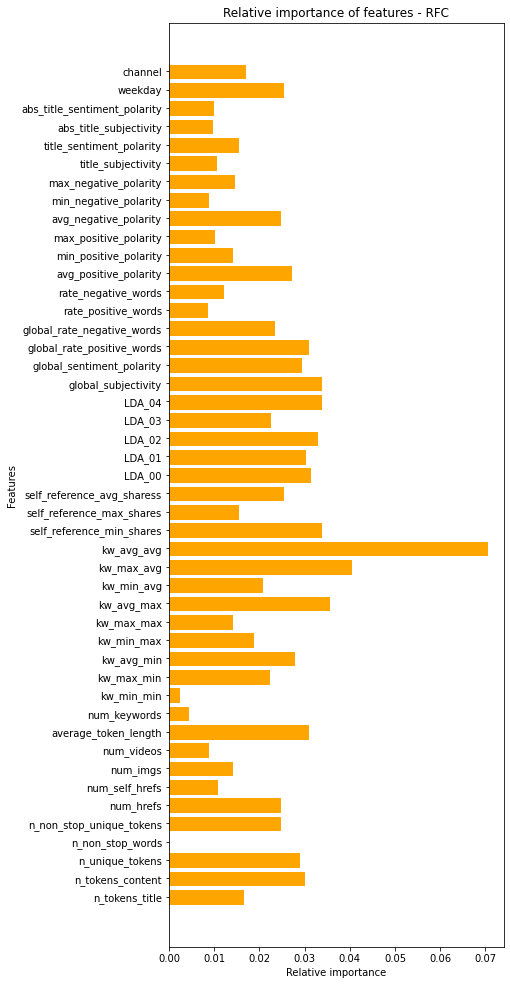

In [ ]:
modele = DecisionTreeClassifier()
modele.fit(x_train,y_train)
y = modele.feature_importances_
fig, ax = plt.subplots() 
ind = np.arange(len(y))
ax.barh(ind, y, color="orange")
width = 0.4 
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train.columns)
fig.set_size_inches(6, 17, forward=True)
plt.xlabel("Relative importance")
plt.ylabel("Features") 
plt.title("Relative importance of features - RFC")

## **Linear Discriminant Analysis**

cross-validation

In [ ]:
modele = LinearDiscriminantAnalysis()
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

predict method

In [ ]:
modele = LinearDiscriminantAnalysis()
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

No features importances

## **Quadratic Discriminant Analysis**

cross-validation

In [ ]:
modele = QuadraticDiscriminantAnalysis()
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


predict method

In [ ]:
modele = QuadraticDiscriminantAnalysis()
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


No features importances

## **Random Forest Classifier**

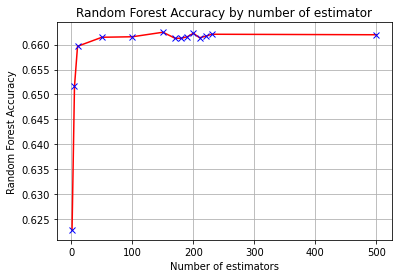

1


In [ ]:
values = [1, 5, 10, 50, 100, 150, 170, 180, 190, 200, 210, 220, 230, 500]
accuracy = []
for n in values:    
    modele = RandomForestClassifier(n_estimators=n, n_jobs=-1, max_depth=8,
                                 random_state=0)
    modele.fit(x_train, y_train)  
    y_pred = modele.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(values, accuracy, 'r-')
plt.plot(values, accuracy, 'bx')
plt.xlabel('Number of estimators')
plt.ylabel('Random Forest Accuracy')
plt.grid()
plt.title('Random Forest Accuracy by number of estimator')
plt.show()

The best number of trees is 150

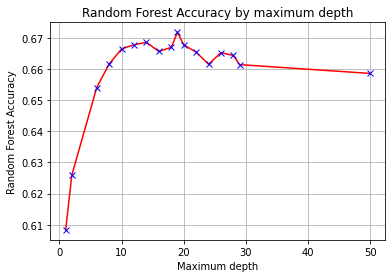

1


In [ ]:
values = [1, 2, 6, 8, 10, 12, 14, 16, 18, 19, 20, 22, 24, 26, 28, 29, 50]
accuracy = []
v_max=values[0]
for n in values:    
    modele = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=n,
                                 random_state=0)
    modele.fit(x_train, y_train)  
    y_pred = modele.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(values, accuracy, 'r-')
plt.plot(values, accuracy, 'bx')
plt.xlabel('Maximum depth')
plt.ylabel('Random Forest Accuracy')
plt.grid()
plt.title('Random Forest Accuracy by maximum depth')
plt.show()

The best number of depth is 19

cross-validation

In [ ]:
modele = RandomForestClassifier(n_estimators = 150, max_depth=19, random_state=0, bootstrap = True, n_jobs=-1) 
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

predict method

In [ ]:
modele = RandomForestClassifier(n_estimators = 150, max_depth=19, random_state=0, bootstrap = True, n_jobs=-1) 
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

features importances

Text(0.5, 1.0, 'Relative importance of features - RFC')

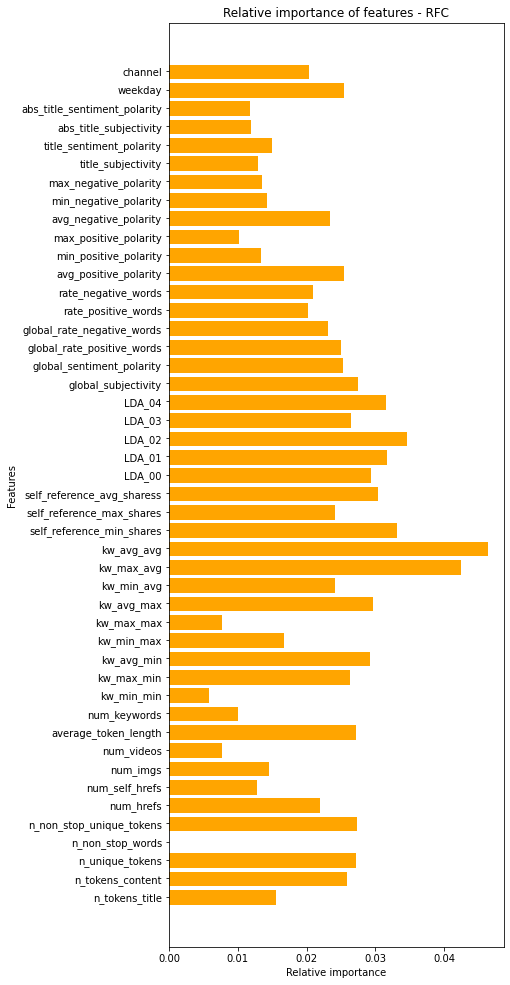

In [ ]:
modele = RandomForestClassifier(n_estimators = 150, max_depth=19, random_state=0, bootstrap = True, n_jobs=-1) 
modele.fit(x_train,y_train)
y = modele.feature_importances_
fig, ax = plt.subplots() 
ind = np.arange(len(y))
ax.barh(ind, y, color="orange")
width = 0.4 
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train.columns)
fig.set_size_inches(6, 17, forward=True)
plt.xlabel("Relative importance")
plt.ylabel("Features") 
plt.title("Relative importance of features - RFC")

## **K-Neighbors Classifier**

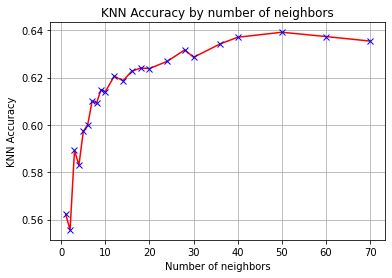

In [ ]:
values = [1,2,3,4,5,6, 7, 8, 9, 10, 12, 14, 16, 18,20,24,28,30,36, 40, 50, 60, 70]
accuracy = []
for n in values:    
    modele = KNeighborsClassifier(n_neighbors=n, n_jobs= -1)
    modele.fit(x_train, y_train)  
    y_pred = modele.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(values, accuracy, 'r-')
plt.plot(values, accuracy, 'bx')
plt.xlabel('Number of neighbors')
plt.ylabel('KNN Accuracy')
plt.grid()
plt.title('KNN Accuracy by number of neighbors')
plt.show()


The best number of neighbors is 50

cross-validation

In [ ]:
modele = KNeighborsClassifier(n_neighbors=50)
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

predict method

In [ ]:
modele = KNeighborsClassifier(n_neighbors=50)
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

No features importances

## **Gaussian Naive-Bayes**

cross-validation

In [ ]:
modele = GaussianNB()
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

predict method

In [ ]:
modele = GaussianNB()
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

No features importances

## **Gradient Boosting**

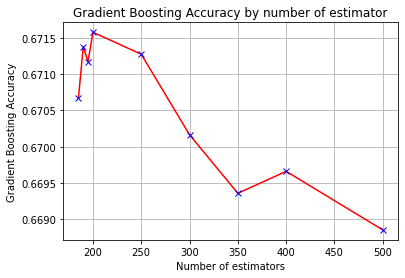

In [ ]:
values = [185, 190,195, 200, 250, 300, 350, 400, 500]
accuracy = []

for n in values:    
    modele = GradientBoostingClassifier(n_estimators=n, max_depth=5,
                                 random_state=0)
    modele.fit(x_train, y_train)  
    y_pred = modele.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(values, accuracy, 'r-')
plt.plot(values, accuracy, 'bx')
plt.xlabel('Number of estimators')
plt.ylabel('Gradient Boosting Accuracy')
plt.grid()
plt.title('Gradient Boosting Accuracy by number of estimator')
plt.show()

the best number of estimators is 200

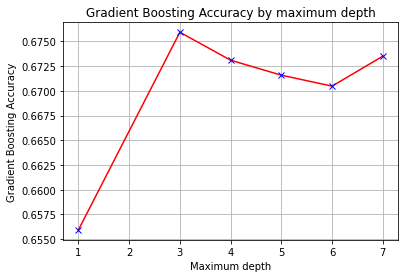

In [ ]:
values = [1, 3, 4, 5, 6, 7]
accuracy = []
for n in values:    
    modele = GradientBoostingClassifier(n_estimators=200, max_depth=n,
                                 random_state=0)
    modele.fit(x_train, y_train)  
    y_pred = modele.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(values, accuracy, 'r-')
plt.plot(values, accuracy, 'bx')
plt.xlabel('Maximum depth')
plt.ylabel('Gradient Boosting Accuracy')
plt.grid()
plt.title('Gradient Boosting Accuracy by maximum depth')
plt.show()

The best depth is 3

cross-validation

In [ ]:
modele = GradientBoostingClassifier(n_estimators=200, max_depth=3,
                                 random_state=0)
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

predict method

In [ ]:
modele = GradientBoostingClassifier(n_estimators=200, max_depth=3,
                                 random_state=0)
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

features importances

Text(0.5, 1.0, 'Relative importance of features - RFC')

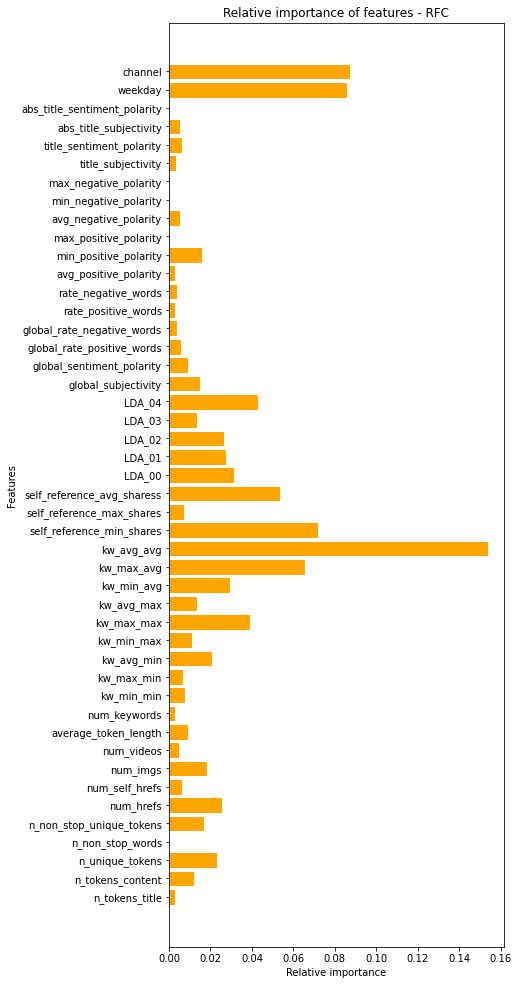

In [ ]:
modele = GradientBoostingClassifier(n_estimators=200, max_depth=3,
                                 random_state=0)
modele.fit(x_train,y_train)
y = modele.feature_importances_
fig, ax = plt.subplots() 
ind = np.arange(len(y))
ax.barh(ind, y, color="orange")
width = 0.4 
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train.columns)
fig.set_size_inches(6, 17, forward=True)
plt.xlabel("Relative importance")
plt.ylabel("Features") 
plt.title("Relative importance of features - RFC")

## **Ada Boost Classifier**

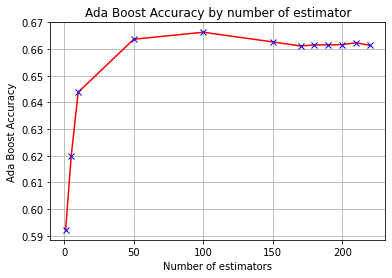

In [ ]:
values = [1, 5, 10, 50, 100, 150, 170, 180, 190, 200, 210, 220]
accuracy = []
for n in values:    
    modele = AdaBoostClassifier(n_estimators=n, random_state=0)
    modele.fit(x_train, y_train)  
    y_pred = modele.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(values, accuracy, 'r-')
plt.plot(values, accuracy, 'bx')
plt.xlabel('Number of estimators')
plt.ylabel('Ada Boost Accuracy')
plt.grid()
plt.title('Ada Boost Accuracy by number of estimator')
plt.show()

The best number of estimator is 100

cross-validation

In [ ]:
modele = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(modele, x_train, y_train, scoring='accuracy', cv=5)
scores.mean()
score = scores.mean()
modele_scores.append(score)

predict method

In [ ]:
modele = AdaBoostClassifier(n_estimators=100)
modele.fit(x_train,y_train)
y_pred = modele.predict(x_test)
score_pred = metrics.accuracy_score(y_test,y_pred)
modele_scores_pred.append(score_pred)

features importances

Text(0.5, 1.0, 'Relative importance of features - RFC')

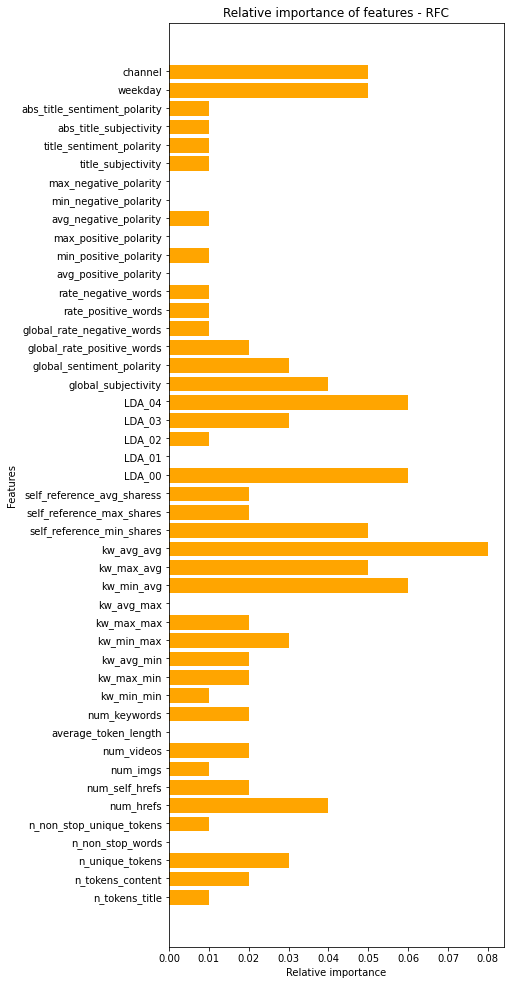

In [ ]:
modele = AdaBoostClassifier(n_estimators=100)
modele.fit(x_train,y_train)
y = modele.feature_importances_
fig, ax = plt.subplots() 
ind = np.arange(len(y))
ax.barh(ind, y, color="orange")
width = 0.4 
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train.columns)
fig.set_size_inches(6, 17, forward=True)
plt.xlabel("Relative importance")
plt.ylabel("Features") 
plt.title("Relative importance of features - RFC")

Now we can create a drataframe composed of all our models and the mean accurency corresponding to it.

In [ ]:
res_modele=pd.DataFrame()
res_modele['modele_names']=modele_names
res_modele['modele_score']=modele_scores
res_modele

,modele_names,modele_score
0,LogisticRegression,0.628494
1,DecisionTreeClassifier,0.575421
2,LinearDiscriminantAnalysis,0.642249
3,QuadraticDiscriminantAnalysis,0.513001
4,RandomForestClassifier,0.668113
5,KNeighborsClassifier,0.634817
6,GaussianNB,0.499952
7,GradientBoostingClassifier,0.674369
8,AdaBoostClassifier,0.664346


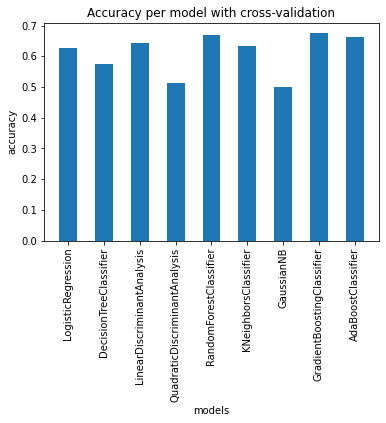

In [ ]:
plt.bar(res_modele['modele_names'], res_modele['modele_score'], width=0.5,linewidth=0.7,)
plt.xticks(rotation = 90)
plt.title('Accuracy per model with cross-validation')
plt.xlabel('models')
plt.ylabel('accuracy')
plt.show()

In [ ]:
res_modele=pd.DataFrame()
res_modele['modele_names']=modele_names
res_modele['modele_scores_pred']=modele_scores_pred
res_modele

,modele_names,modele_scores_pred
0,LogisticRegression,0.632025
1,DecisionTreeClassifier,0.582787
2,LinearDiscriminantAnalysis,0.642418
3,QuadraticDiscriminantAnalysis,0.504793
4,RandomForestClassifier,0.664211
5,KNeighborsClassifier,0.630310
6,GaussianNB,0.480577
7,GradientBoostingClassifier,0.666734
8,AdaBoostClassifier,0.658662


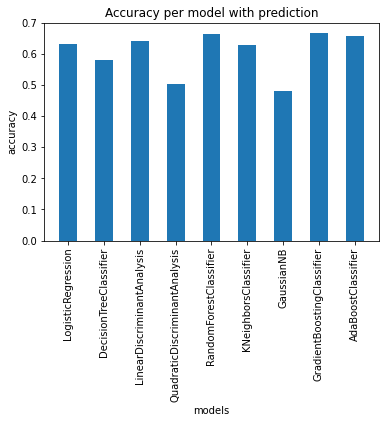

In [ ]:
plt.bar(res_modele['modele_names'], res_modele['modele_scores_pred'], width=0.5,linewidth=0.7,)
plt.xticks(rotation = 90)
plt.title('Accuracy per model with prediction')
plt.xlabel('models')
plt.ylabel('accuracy')
plt.show()

On both graphs, we can observ that the model which is fitting the best to the dataset according to the cross-validation method is the Gradient Boositng Model, with an accuracy of 0.665019. On the next part, we are going to focus on this model to improve its parameters.

## **Tuning of Gradient Boost model**

First, we are going to determine the optimun number of features to get the minimum time of running for the best accuracy. For that, we will use the method RFEVC from sklearn.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Optimal number of features : 31


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


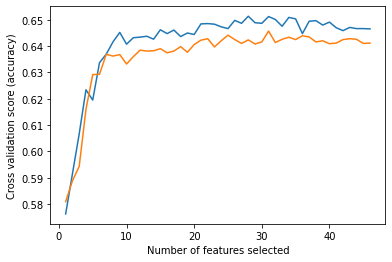

In [ ]:
# Create the RFE object and compute a cross-validated score.
modele = GradientBoostingClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=modele,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

Thanks to the method RFE from sklearn, we will be able to get the best 31 features from the dataset.

In [ ]:
GradientBoostingClassifier(n_estimators=200, max_depth=3,random_state=0)
selecteur = RFE(estimator=modele,n_features_to_select=31)
sol = selecteur.fit(x_train,y_train)
x_new_train = x_train.loc[:,sol.support_]
print(x_new_train.columns)

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'min_positive_polarity', 'avg_negative_polarity',
       'title_subjectivity', 'title_sentiment_polarity',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'weekday',
       'channel'],
      dtype='object')


Next we are going to find the best parameters for the Gradient Boosting Classifier.

In [ ]:
parameters = {
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.1,1],
              'min_samples_leaf': [4,5,6],
              }

Thanks to the method GridSearchCV from sklearn, we can get the best combination of parameters for the modele.

In [ ]:
modele = GradientBoostingClassifier(n_estimators=200, max_depth=3,random_state=0)
clf_gbm = GridSearchCV(modele, parameters, n_jobs=5,cv = 5)
clf_gbm.fit(x_new_train,y_train)
print(clf_gbm.best_params_)
print(clf_gbm.best_score_)

{'learning_rate': 0.1, 'max_features': 'sqrt', 'min_samples_leaf': 5}
0.670298817941712


We can observe that the best combination of parameters is this one : 
max_features=sqrt
learning_rate=0.1
max_depth=3
min_samples_leaf=5,
n_estimators=200

In [ ]:
modele =GradientBoostingClassifier(
                                max_features='sqrt',
                                learning_rate=0.1,
                                max_depth= 3,
                                min_samples_leaf= 5,
                                n_estimators=200)
modele_sel = modele.fit(x_new_train,y_train)
x_new_test = x_test.loc[:,sol.support_]
y_pred_sel = modele_sel.predict(x_new_test)
print(metrics.accuracy_score(y_test,y_pred_sel))

0.6702653617193017


**API WITH FLASK**

Now that we have our best models with the best parameters, let's use it to create an API with flask which take saveral features which are understandable by the user (we will not use the 37 features recommanded by RFE model and then answer if the article is popular or not thanks to the model.